In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Processed Data/To_Use_data.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34,37,20.879744,82.002744,6.502985,202.935536,rice
1,78,21,20,21.770462,80.319644,7.038096,226.655537,rice
2,92,31,34,23.004459,82.320763,7.840207,263.964248,rice
3,98,38,45,26.491096,80.158363,6.980401,242.864034,rice
4,79,53,43,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.shape

(2200, 8)

In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map = {labels[i]:i+1 for i in range(len(labels))}
labels_map

{'rice': 1,
 'maize': 2,
 'chickpea': 3,
 'kidneybeans': 4,
 'pigeonpeas': 5,
 'mothbeans': 6,
 'mungbean': 7,
 'blackgram': 8,
 'lentil': 9,
 'pomegranate': 10,
 'banana': 11,
 'mango': 12,
 'grapes': 13,
 'watermelon': 14,
 'muskmelon': 15,
 'apple': 16,
 'orange': 17,
 'papaya': 18,
 'coconut': 19,
 'cotton': 20,
 'jute': 21,
 'coffee': 22}

In [9]:
dummm = df.copy()
df['label'] = df['label'].map(labels_map)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34,37,20.879744,82.002744,6.502985,202.935536,1
1,78,21,20,21.770462,80.319644,7.038096,226.655537,1
2,92,31,34,23.004459,82.320763,7.840207,263.964248,1
3,98,38,45,26.491096,80.158363,6.980401,242.864034,1
4,79,53,43,20.130175,81.604873,7.628473,262.717340,1


<Axes: xlabel='label', ylabel='count'>

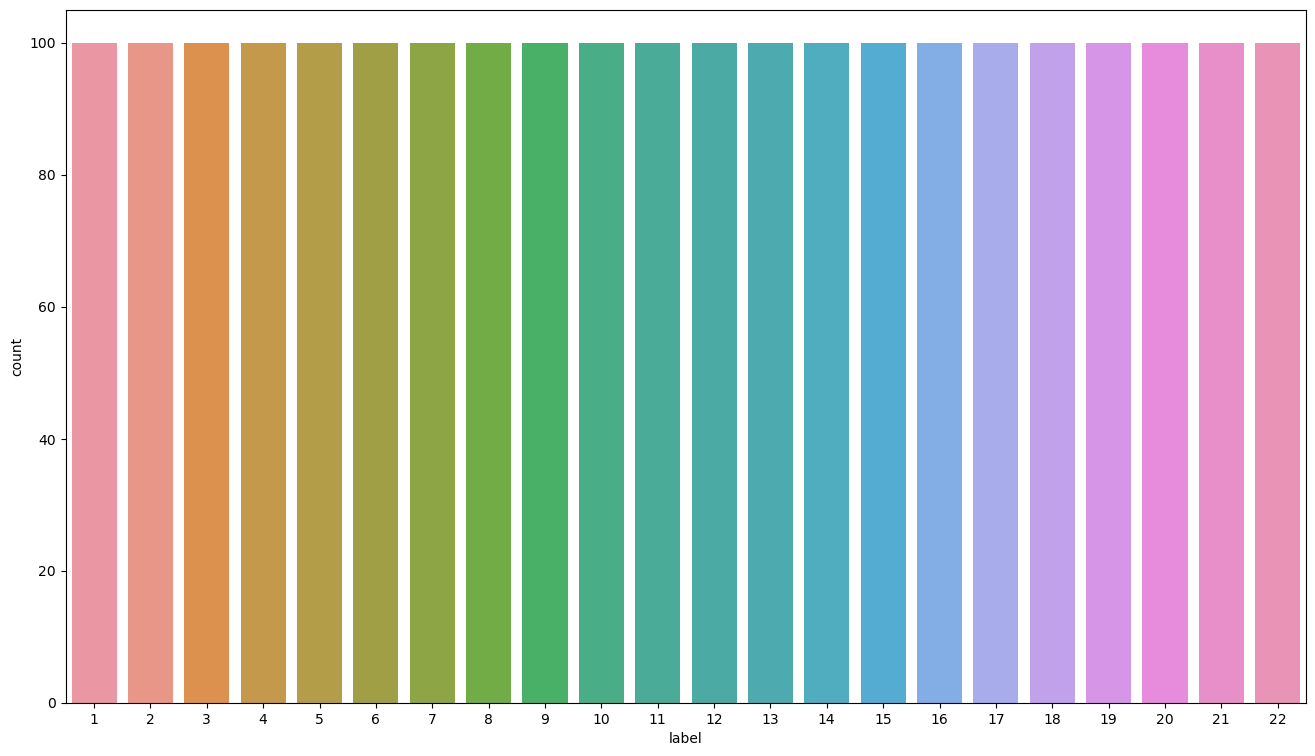

In [10]:
sn.set_palette('Set3')
plt.figure(figsize=(16,9))
sn.countplot(data=df,x = 'label')

In [11]:
import scipy.stats as stats

In [12]:
def visualise(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color = 'pink')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sn.boxplot(df[col],color = 'pink')
    
    plt.show()

 Statistical plots for : N is shown ↓


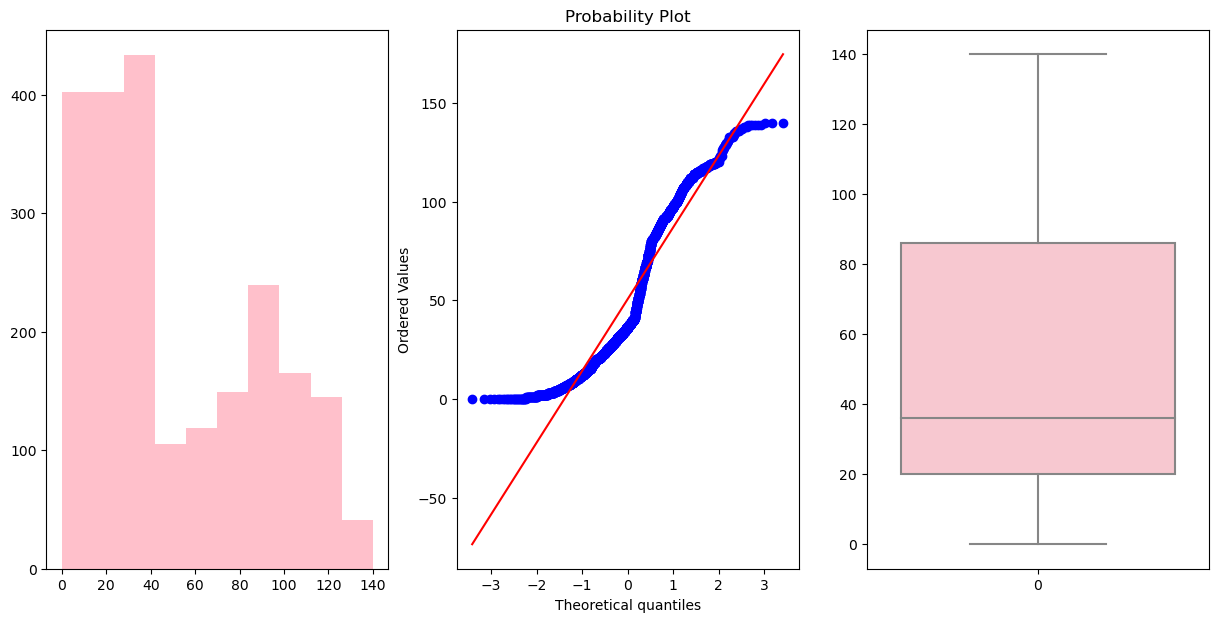

------------------------------------------------------------
 Statistical plots for : P is shown ↓


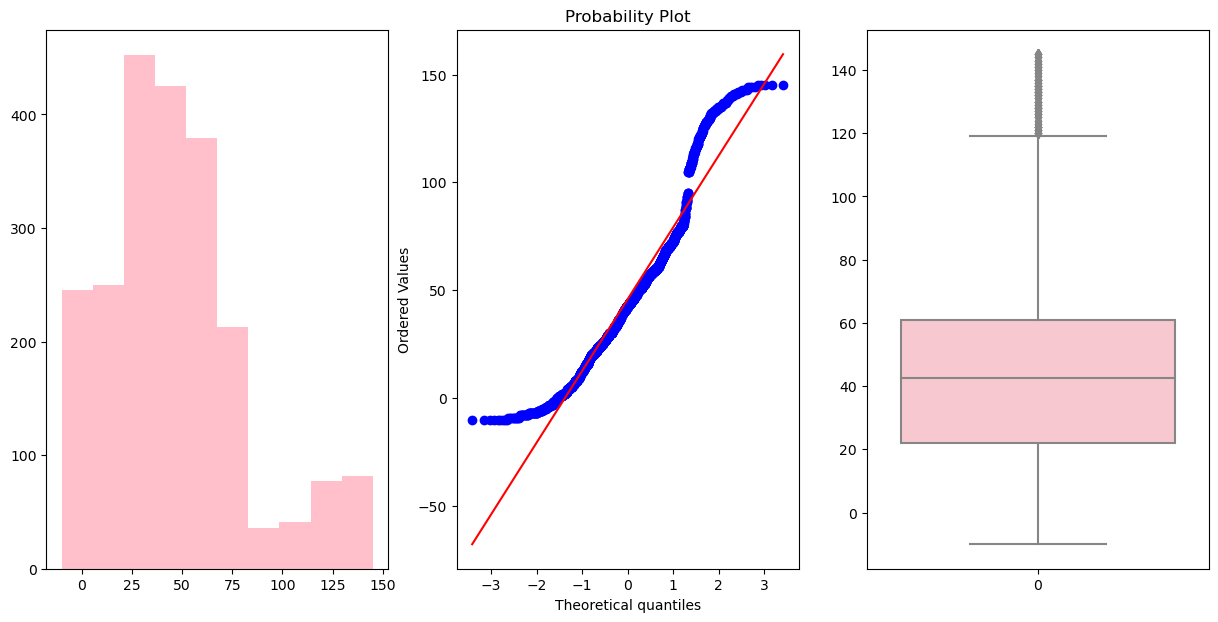

------------------------------------------------------------
 Statistical plots for : K is shown ↓


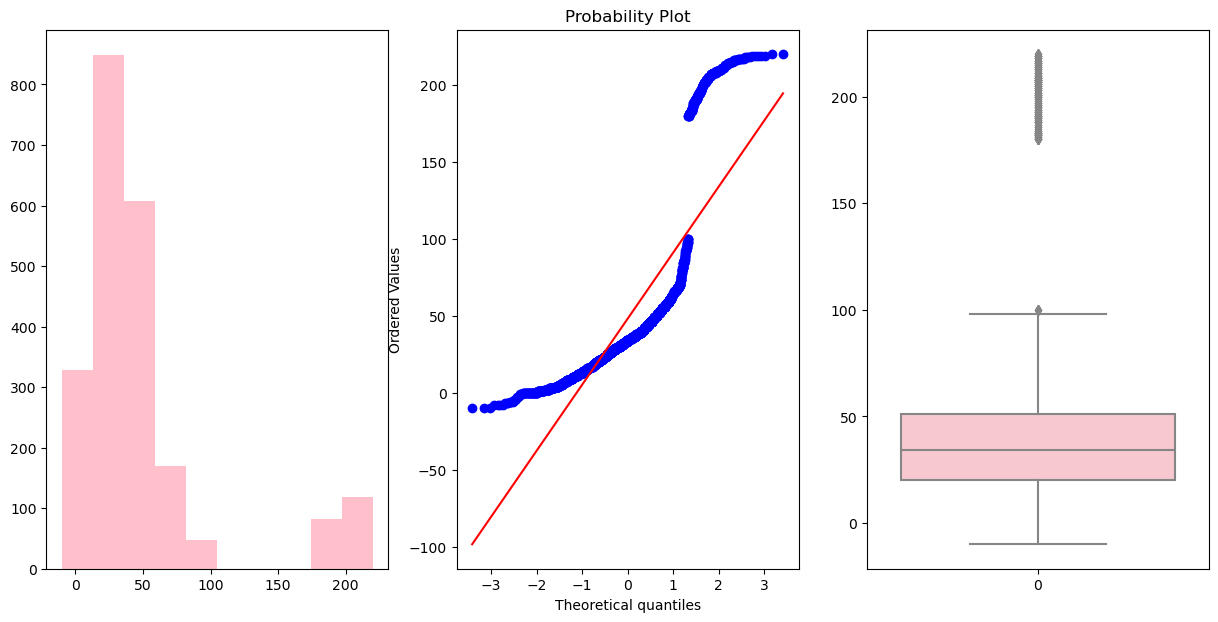

------------------------------------------------------------
 Statistical plots for : temperature is shown ↓


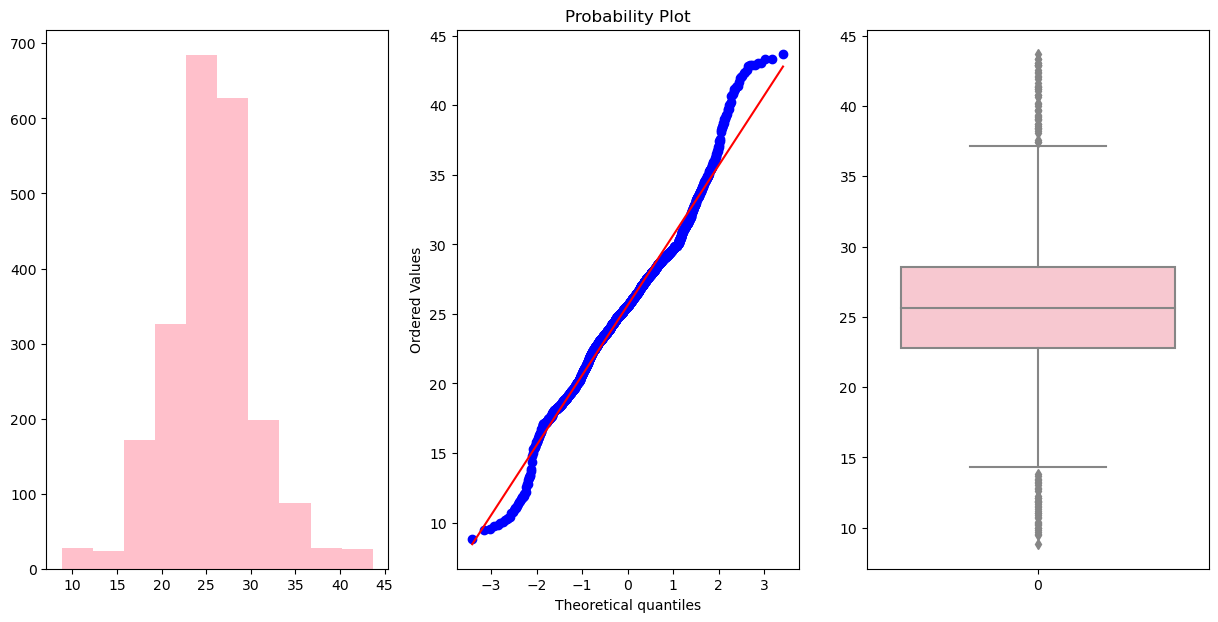

------------------------------------------------------------
 Statistical plots for : humidity is shown ↓


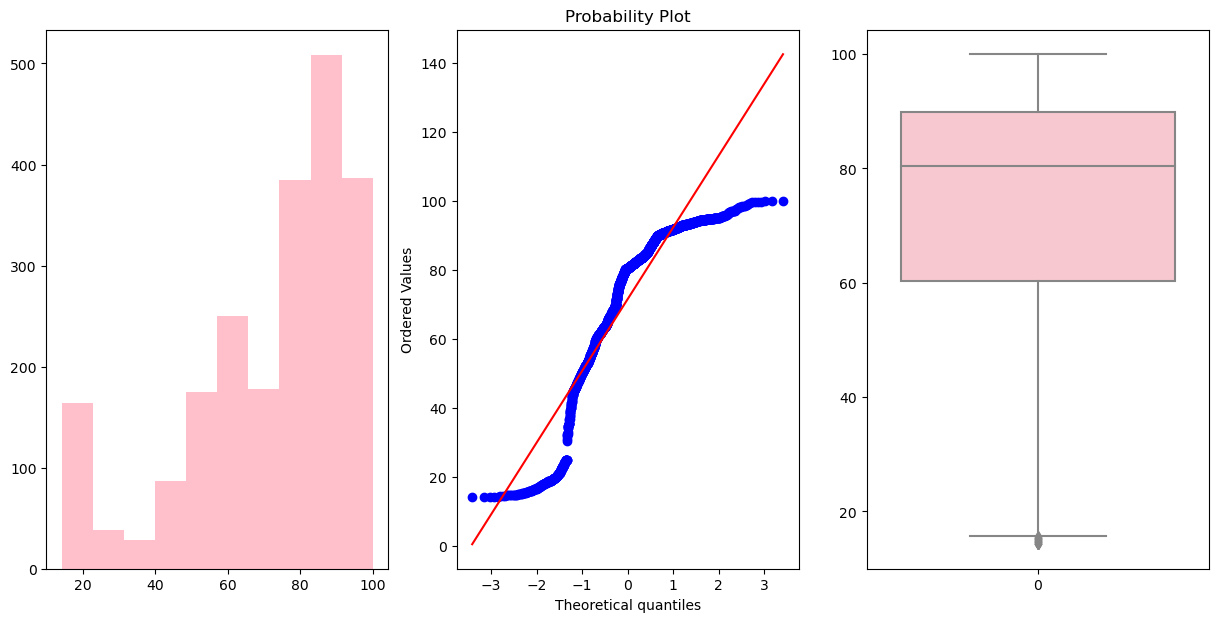

------------------------------------------------------------
 Statistical plots for : ph is shown ↓


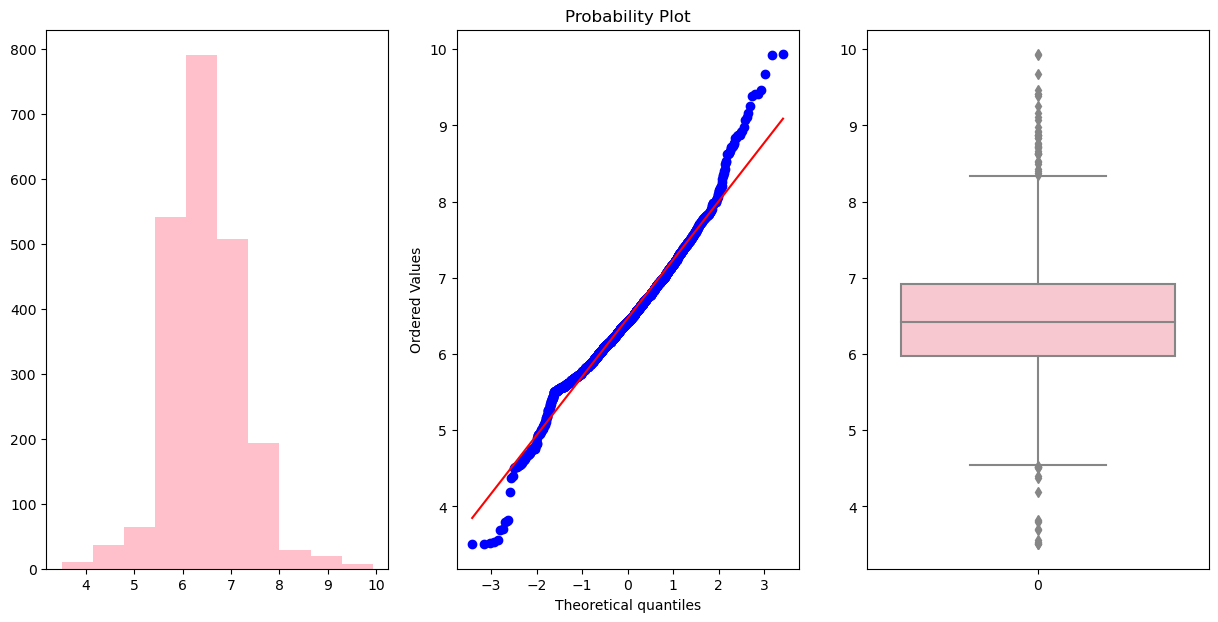

------------------------------------------------------------
 Statistical plots for : rainfall is shown ↓


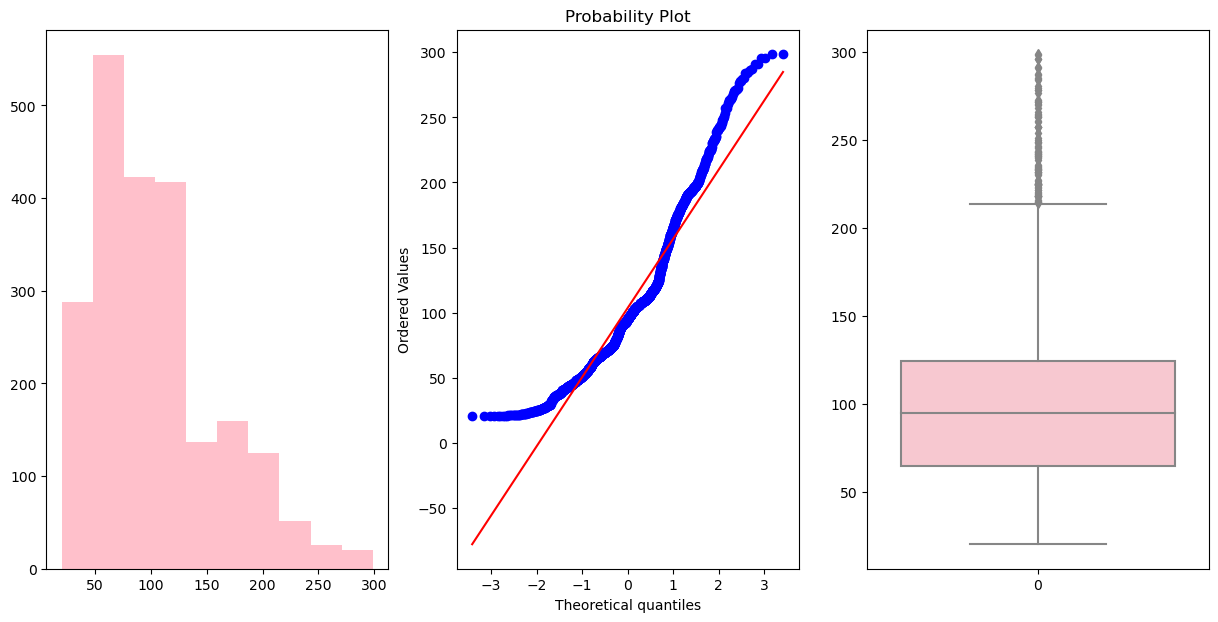

------------------------------------------------------------


In [13]:
for i in df.columns[:-1]:
    print(f' Statistical plots for : {i} is shown ↓')
    visualise(df,i)
    print("-"*60)

## Outlier Removal

### First Lets detect the outliers as shown ↓

**We will be using the gaussian trainsformation technique which says if there are datapoints greater than "mean+{num} * std",then there is a possibilty that that particular datapoint will not fit in the gaussian distribution,so here i have choosen the num as 3,so my range is {lower,upper} = {mean-{3} * std,mean+{3} * std},if there are any datapoints beyond these ranges,then they must be removed,so we find there are couple of data points of that,inorder to remove these outilers,we will be using another method of `Quantiles` which is `Inter Quantile Range` which is a better approach!**

In [14]:
temp = df.copy()

In [15]:
upper_list = []
lower_list = []

for i in temp.columns[:-1]:
    upper_list.append(df[i].mean()+(df[i].std())*3)
    lower_list.append(df[i].mean()-(df[i].std())*3)
    

In [16]:
j = 0
for i in temp.columns[:-1]:
    dummy = temp[(temp[i]>upper_list[j])|(temp[i]<lower_list[j])];j+=1

In [17]:
dummy

,N,P,K,temperature,humidity,ph,rainfall,label
6,75,23,28,22.708838,82.639414,5.700806,271.324860,1
12,86,52,48,26.800796,80.886848,5.108682,284.436457,1
16,61,46,51,21.587118,82.788371,6.249051,276.655246,1
19,100,46,34,23.579436,83.587603,5.853932,291.298662,1
26,96,32,31,26.359272,84.044036,6.286500,271.358614,1
30,68,34,49,21.446540,84.943760,5.824709,272.201720,1
33,94,25,30,20.267076,81.638952,5.014507,270.441727,1
36,78,23,40,26.757542,81.177340,5.960370,272.299906,1
37,74,42,29,23.863305,83.152508,5.561399,285.249365,1
38,68,60,49,21.019447,82.952217,7.416245,298.401847,1


## Outlier Removal using IQR technique

In [18]:
def quantile(df,val):
    a = []
    df_upper_limit = df[val].quantile(0.75)
    df_lower_limit = df[val].quantile(0.25)
    iqr = df_upper_limit-df_lower_limit
    upper_limit = float(df_upper_limit+(iqr)*1.5)
    lower_limit = float(df_lower_limit-(iqr)*1.5)
    
    for i in df[val]:
        if i>upper_limit:
            i = np.NaN
            
        elif i<lower_limit:
            i = np.NaN
            
        else:
            i = i
            
        a.append(i)
        
    return a
            
    

In [19]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [20]:
temp = df.copy()
temp['N'] = quantile(temp,'N')
temp['P'] = quantile(temp,'P')
temp['K'] = quantile(temp,'K')
temp['temperature'] = quantile(temp,'temperature')
temp['humidity'] = quantile(temp,'humidity')
temp['ph'] = quantile(temp,'ph')
temp['rainfall'] = quantile(temp,'rainfall')
temp.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1
1,78,21.0,20.0,21.770462,80.319644,7.038096,NaN,1
2,92,31.0,34.0,23.004459,82.320763,7.840207,NaN,1
3,98,38.0,45.0,26.491096,80.158363,6.980401,NaN,1
4,79,53.0,43.0,20.130175,81.604873,7.628473,NaN,1


In [21]:
temp = temp.dropna()
temp.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [22]:
temp.shape

(1766, 8)

In [23]:
temp.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1
13,86,20.0,31.0,24.014976,82.056872,6.984354,185.277339,1
14,75,22.0,56.0,25.665852,80.663850,6.948020,209.586971,1
17,69,45.0,28.0,23.793920,80.418180,6.970860,206.261186,1
20,62,49.0,37.0,21.325042,80.474764,6.442475,185.497473,1


 Statistical plots for N is shown ↓


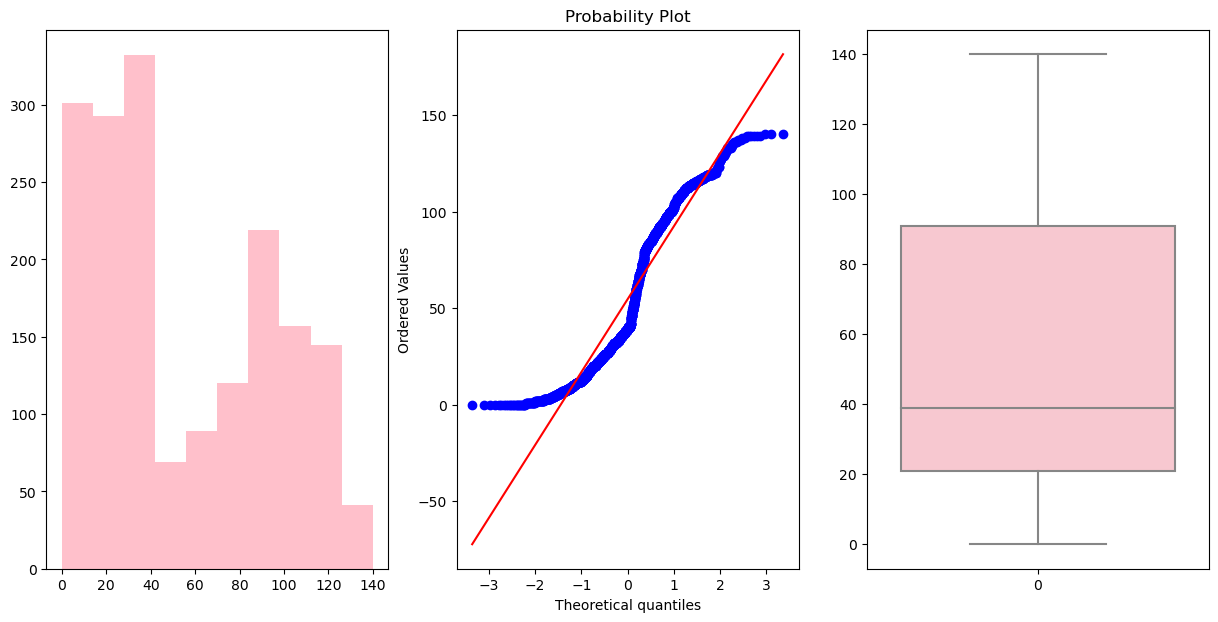

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for P is shown ↓


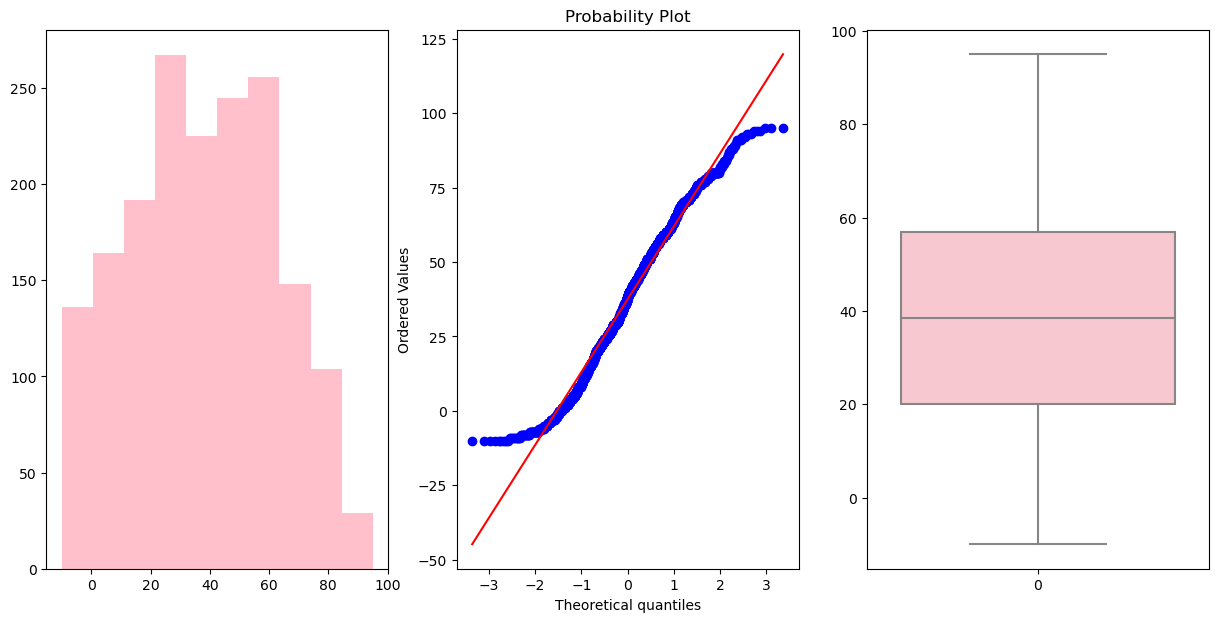

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for K is shown ↓


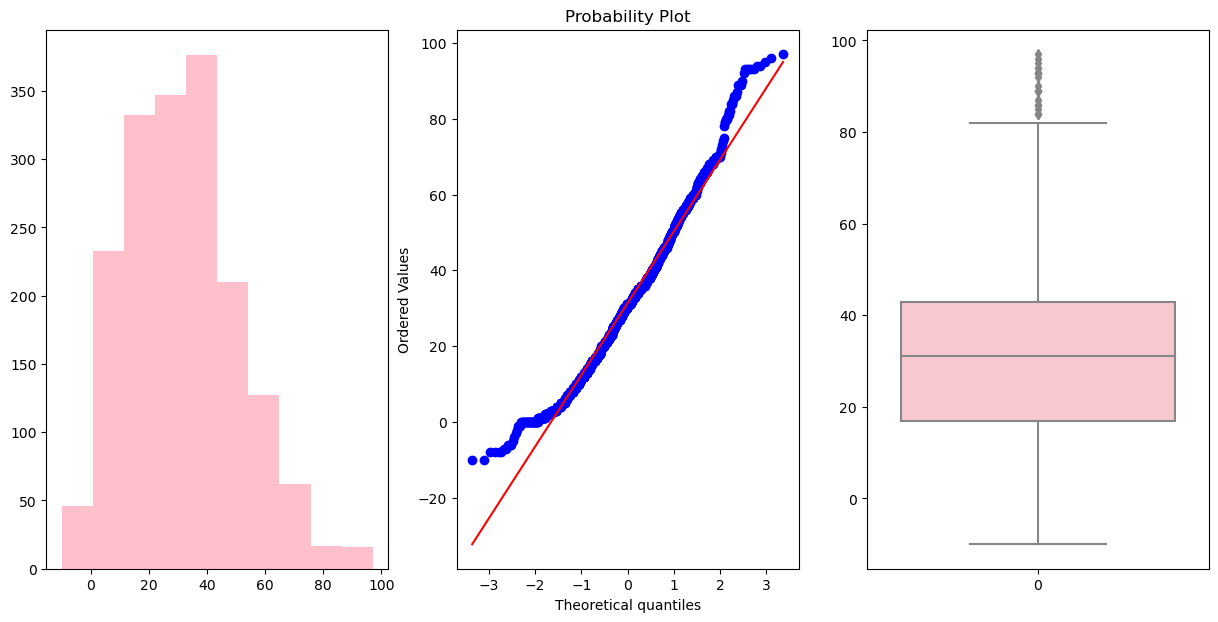

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for temperature is shown ↓


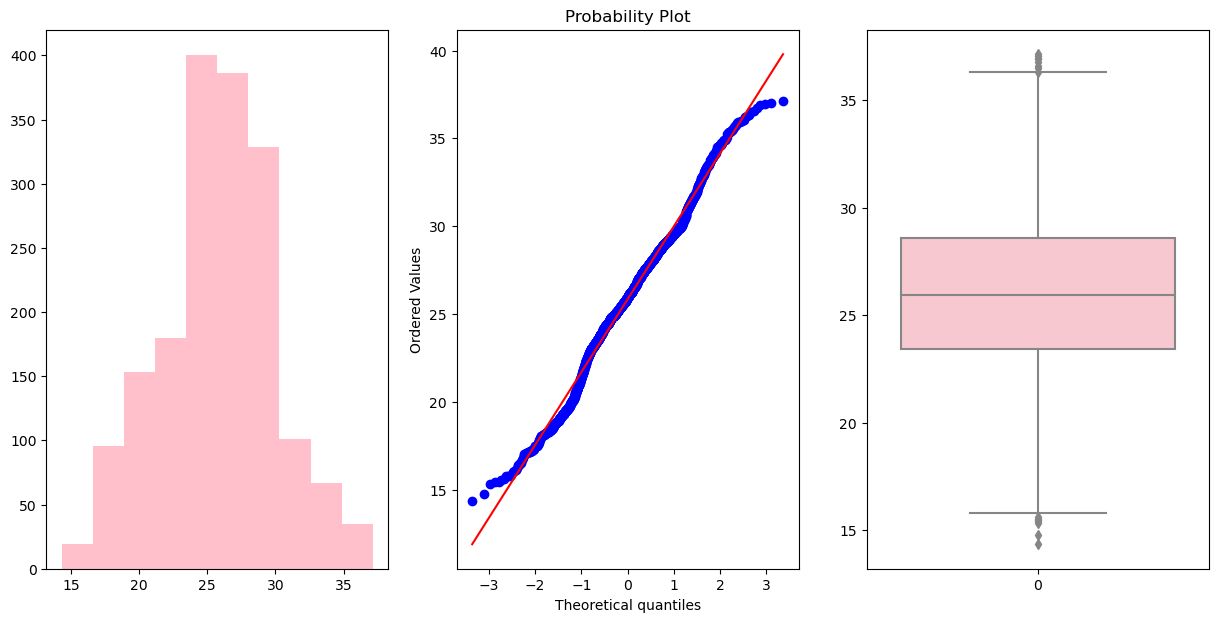

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for humidity is shown ↓


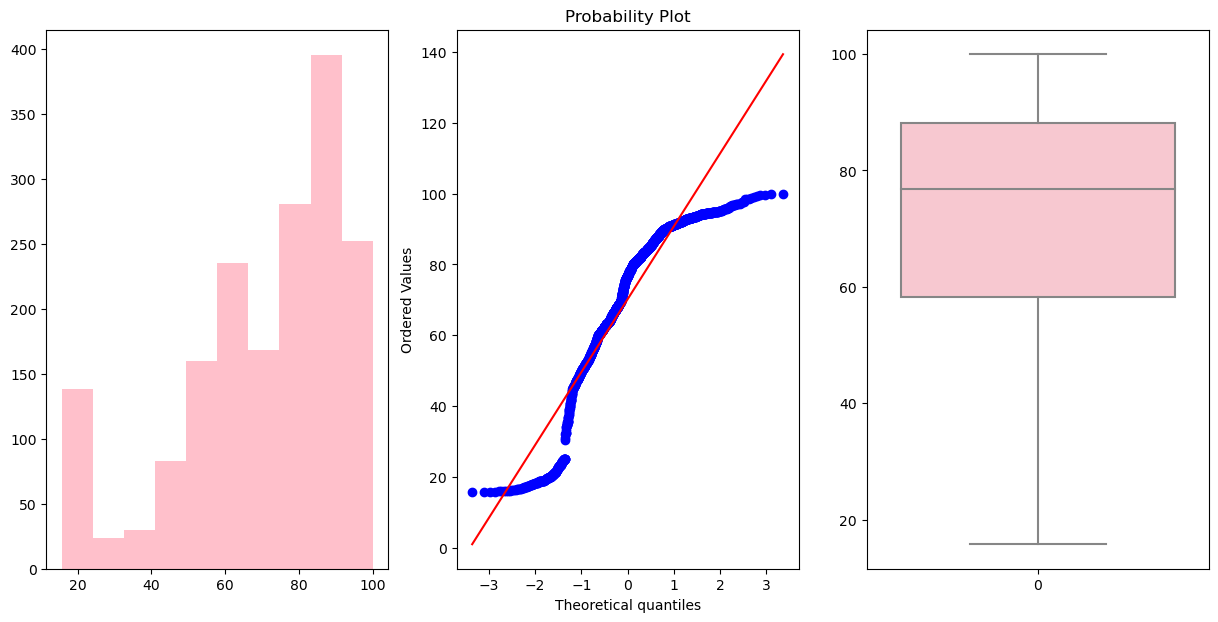

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for ph is shown ↓


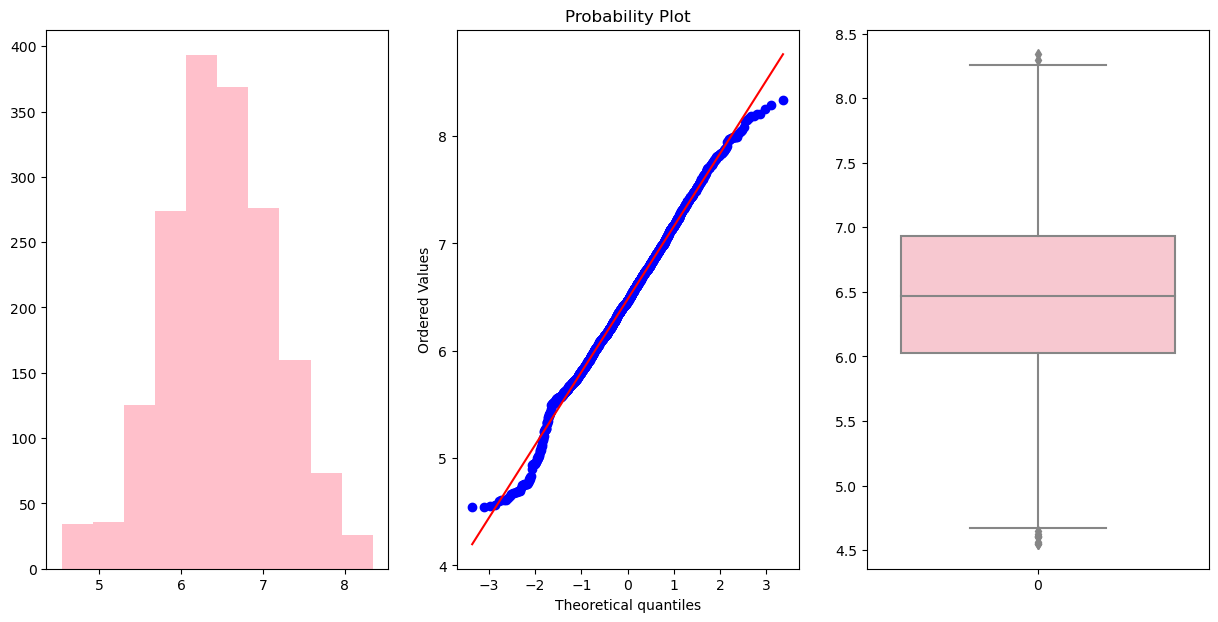

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for rainfall is shown ↓


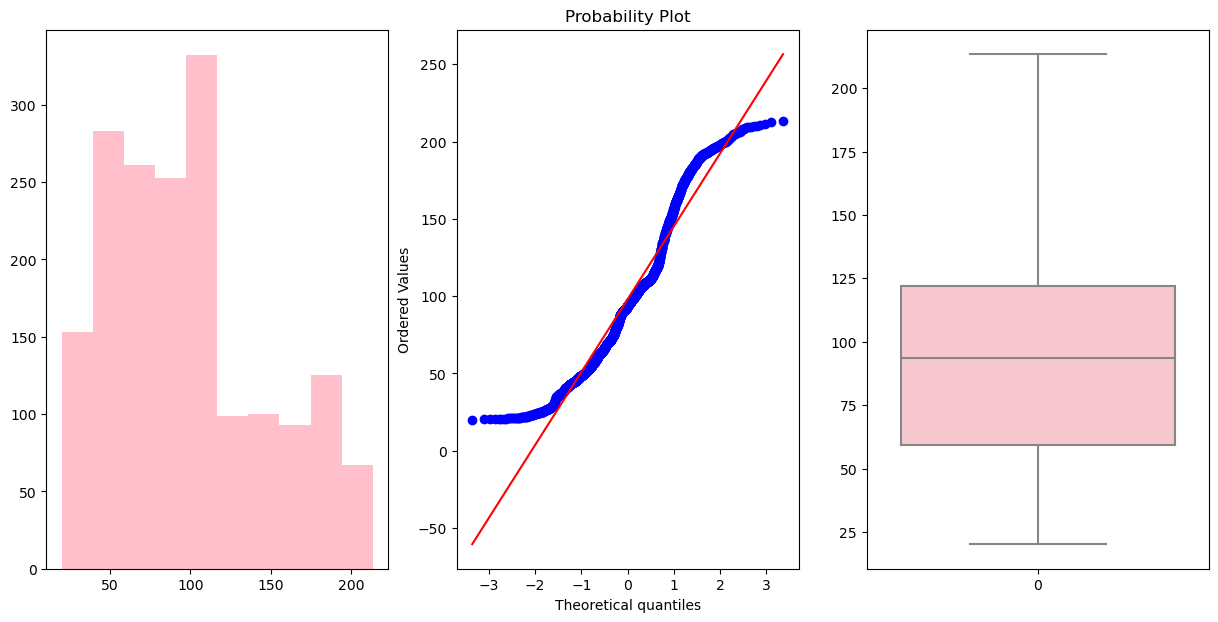

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


In [24]:
for i in temp.columns[:-1]:
    print(f' Statistical plots for {i} is shown ↓')
    visualise(temp,i)
    print("=>"*50)

**Now we have to see which all values Are not properly normally distributed,well there are few like `N,humidity,rainfall`,as we can observe from the Q-Q plot,they're not that correctly fitted,lets try to fix them a bit**

((array([-3.41834386, -3.16906693, -3.03090347, ...,  3.03090347,
          3.16906693,  3.41834386]),
  array([ 0.        ,  0.        ,  0.        , ..., 15.52214998,
         15.52214998, 15.52214998])),
 (3.8370176242457106, 8.60900074072838, 0.9809808425996115))

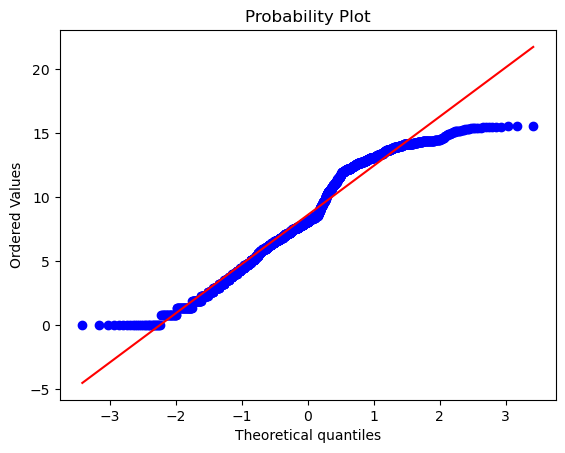

In [25]:
data = df.copy()
data['N'],params = stats.boxcox(data['N']+1)
stats.probplot(data['N'],dist='norm',plot=plt)

((array([-3.35808769, -3.10465012, -2.96393634, ...,  2.96393634,
          3.10465012,  3.35808769]),
  array([ 0.        ,  0.        ,  0.        , ..., 61.43841876,
         61.43841876, 61.43841876])),
 (16.513977488284294, 26.88812089792998, 0.9652035685212719))

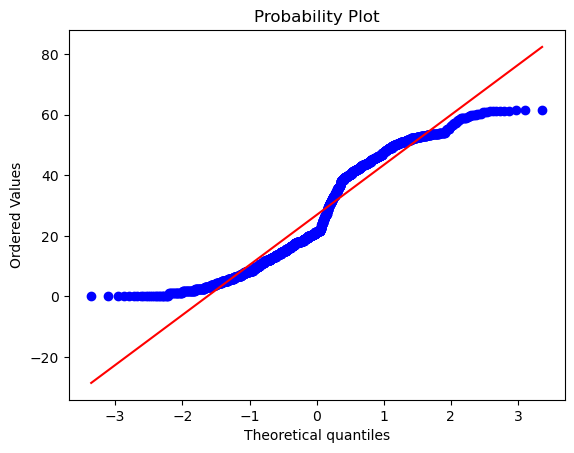

In [26]:
data = temp.copy()
data['N'] = data.N**(1/1.2)
stats.probplot(data['N'],dist='norm',plot=plt)

In [27]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [28]:
temp.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1
13,86,20.0,31.0,24.014976,82.056872,6.984354,185.277339,1


In [29]:
test = temp['label']
train = temp.drop(['label'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size = 0.2)

In [30]:
sc = StandardScaler()
train_scaled = sc.fit_transform(X_train)
test_scaled = sc.transform(X_test)

 Statistical plots for N is shown ↓


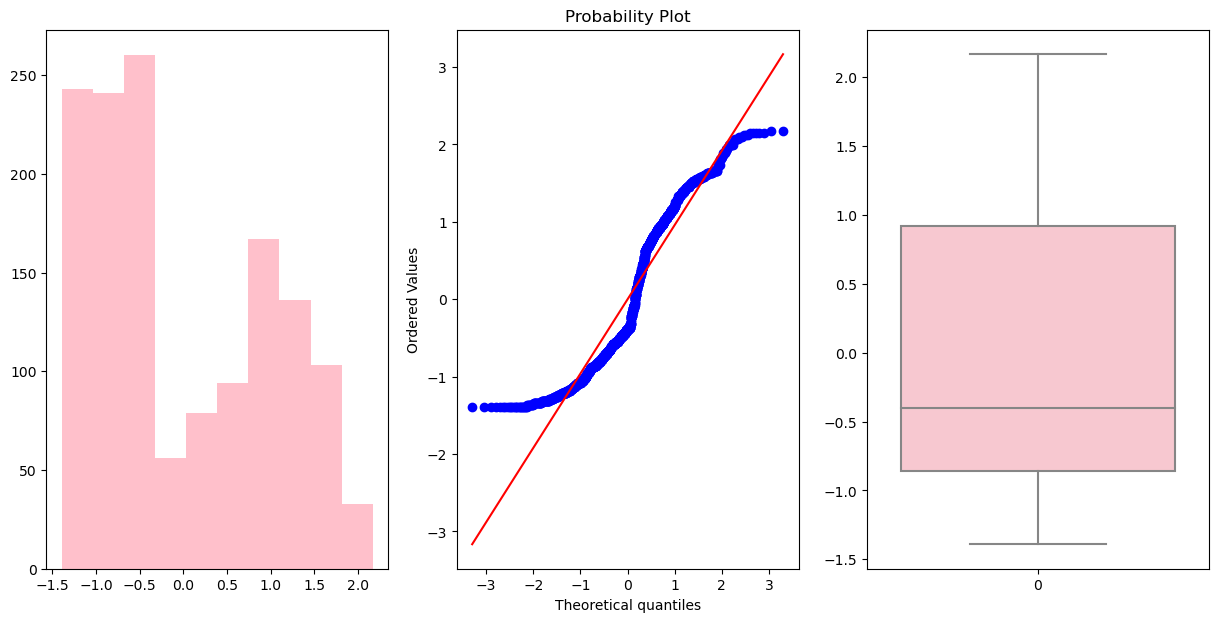

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for P is shown ↓


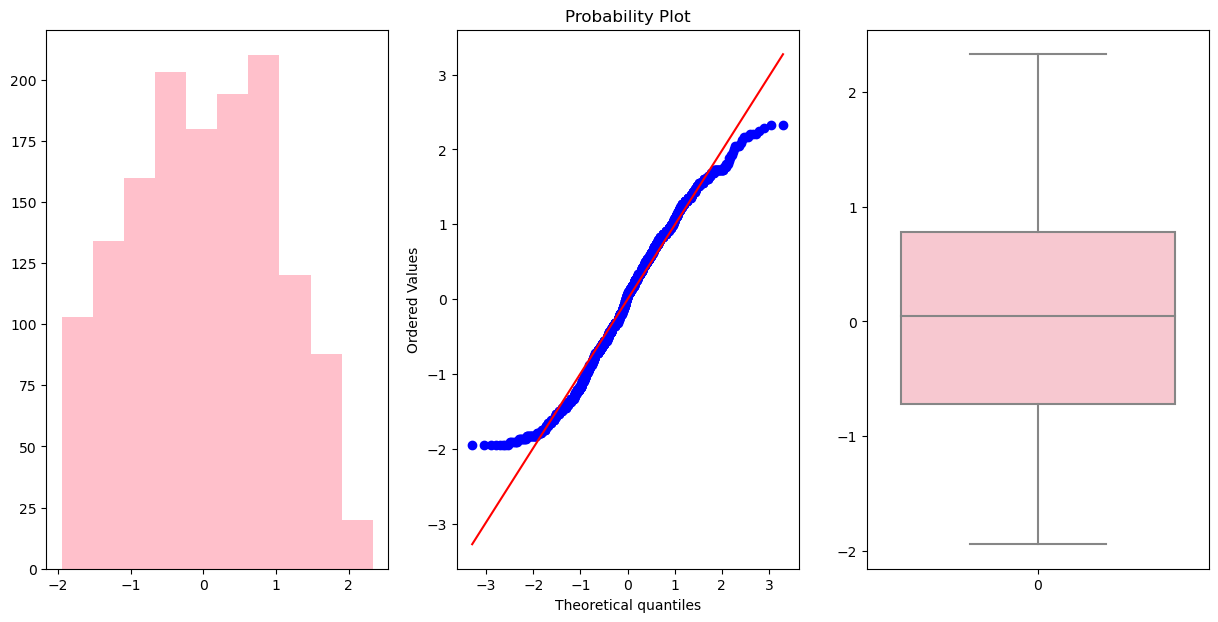

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for K is shown ↓


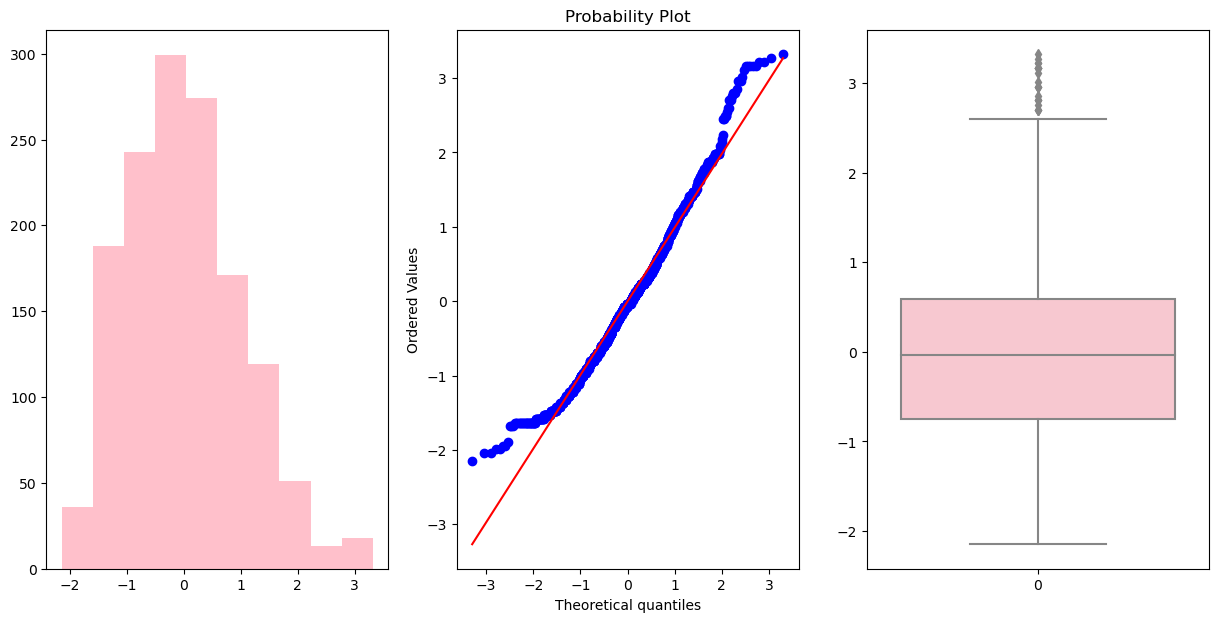

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for temperature is shown ↓


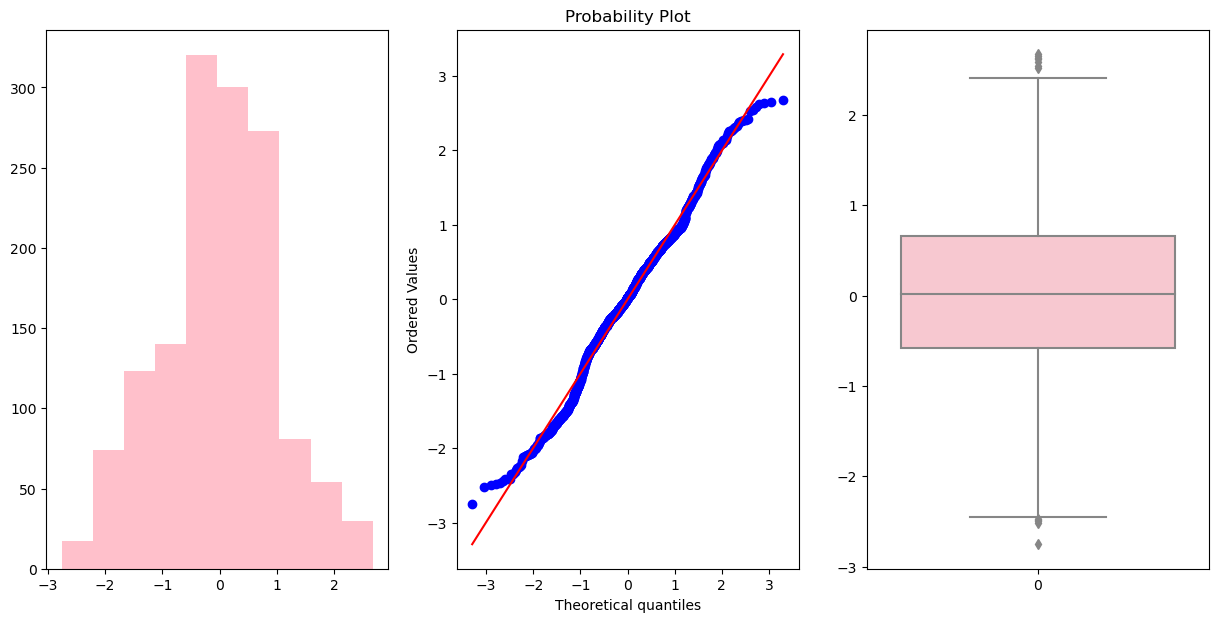

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for humidity is shown ↓


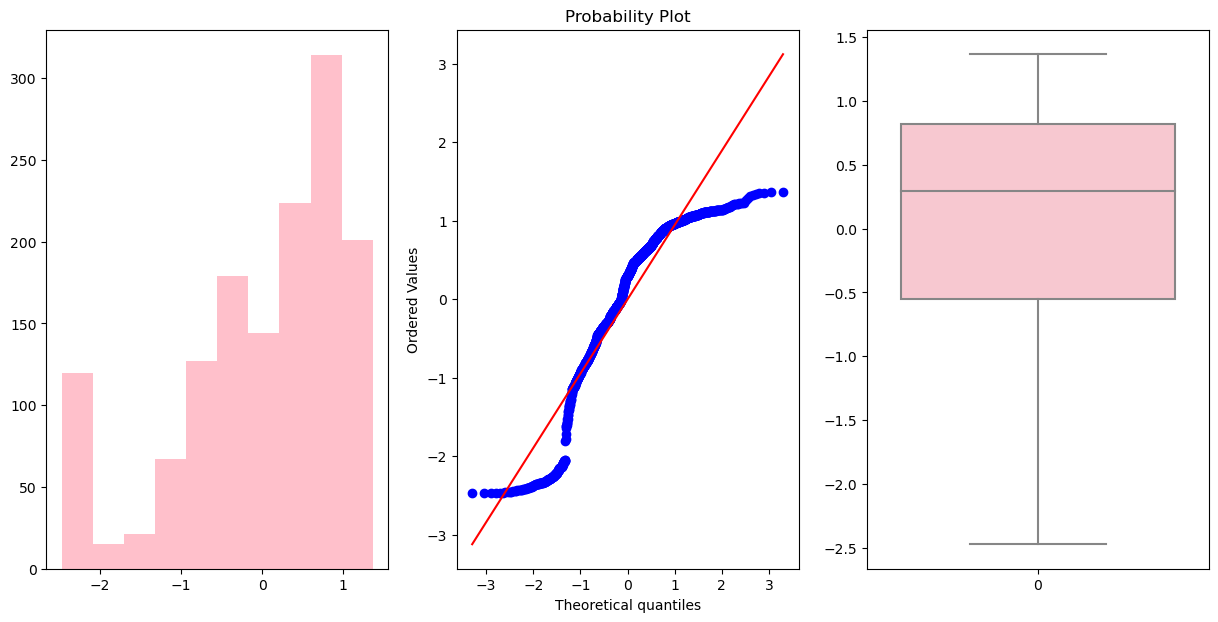

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for ph is shown ↓


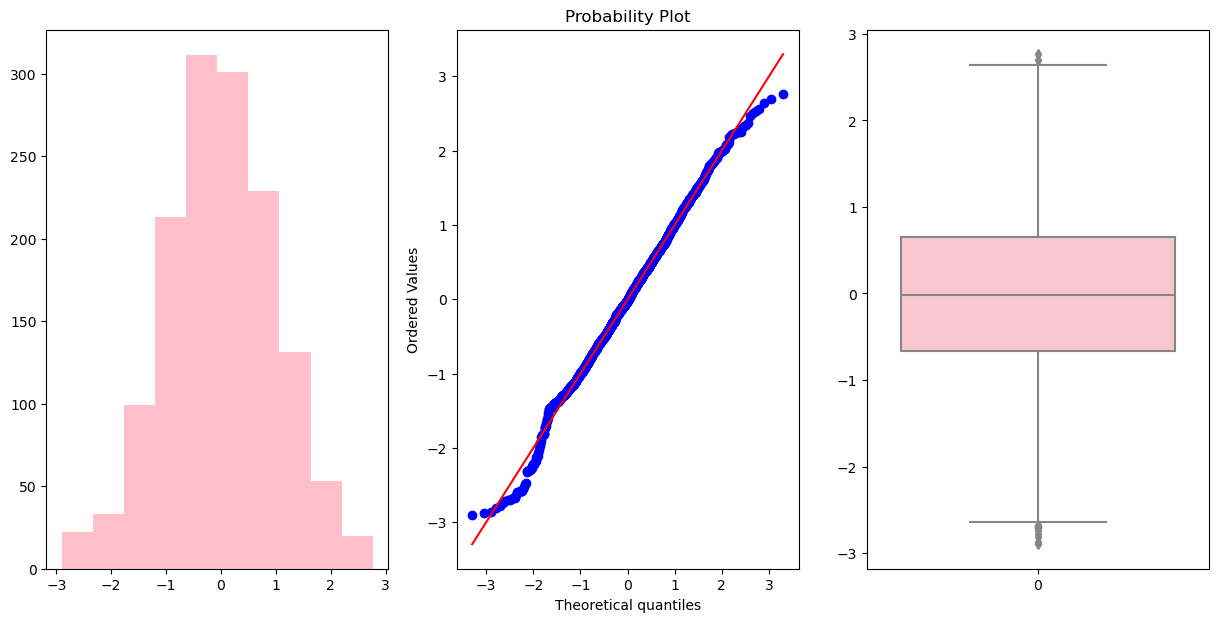

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for rainfall is shown ↓


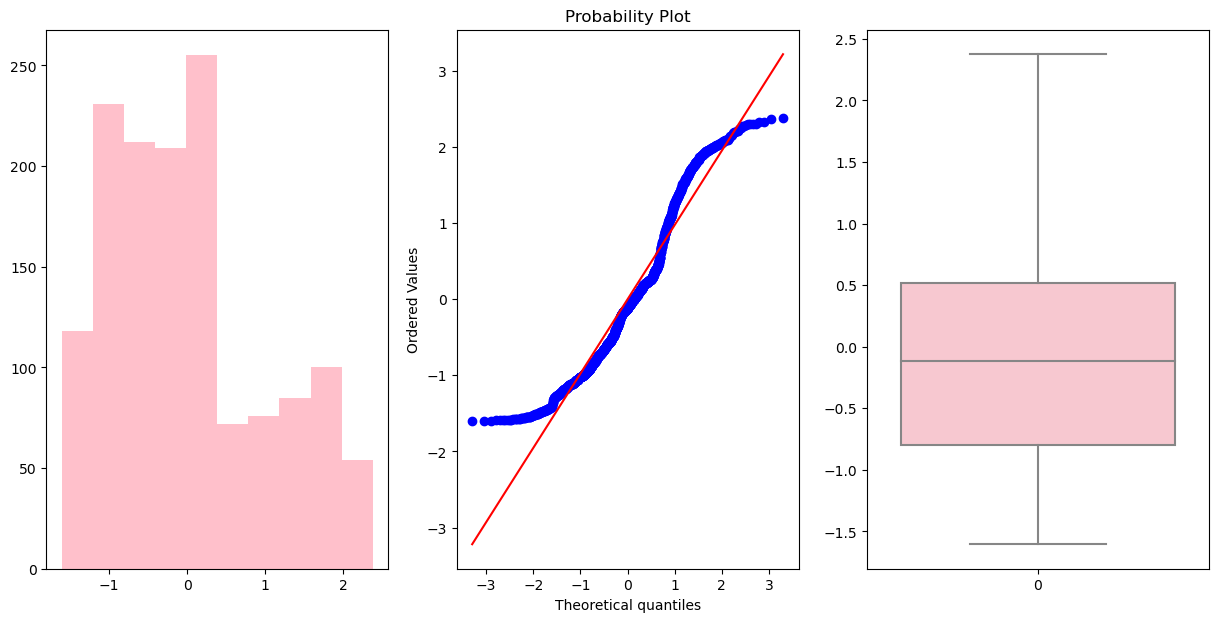

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


In [31]:
scaled_df = pd.DataFrame(train_scaled,columns=train.columns)
for i in scaled_df.columns:
    print(f' Statistical plots for {i} is shown ↓')
    visualise(scaled_df,i)
    print("=>"*50)

In [32]:
scaled_df.head()

,N,P,K,temperature,humidity,ph,rainfall
0,-1.390399,-0.844343,0.071007,0.602942,1.179807,-1.226975,2.181352
1,0.312482,0.743862,0.174157,-0.615531,0.157375,-0.948122,-0.077511
2,-0.119593,0.255183,-1.269945,0.898869,-0.041765,0.477974,-0.667466
3,-0.373754,1.232540,-0.754194,-0.600502,-2.188595,-1.110054,-0.214079
4,1.532456,-0.722173,0.999358,0.753411,0.956121,-0.699205,-1.420444


In [33]:
mm = MinMaxScaler()
train_mm = mm.fit_transform(X_train)
test_mm = mm.transform(X_test)

 Statistical plots for N is shown ↓


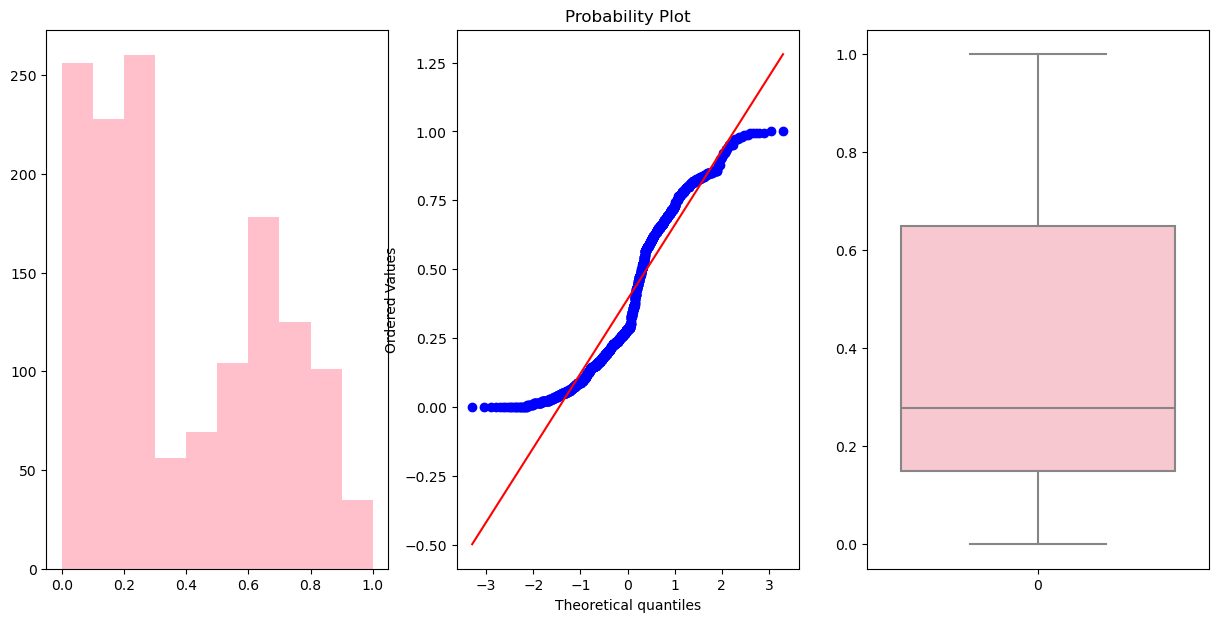

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for P is shown ↓


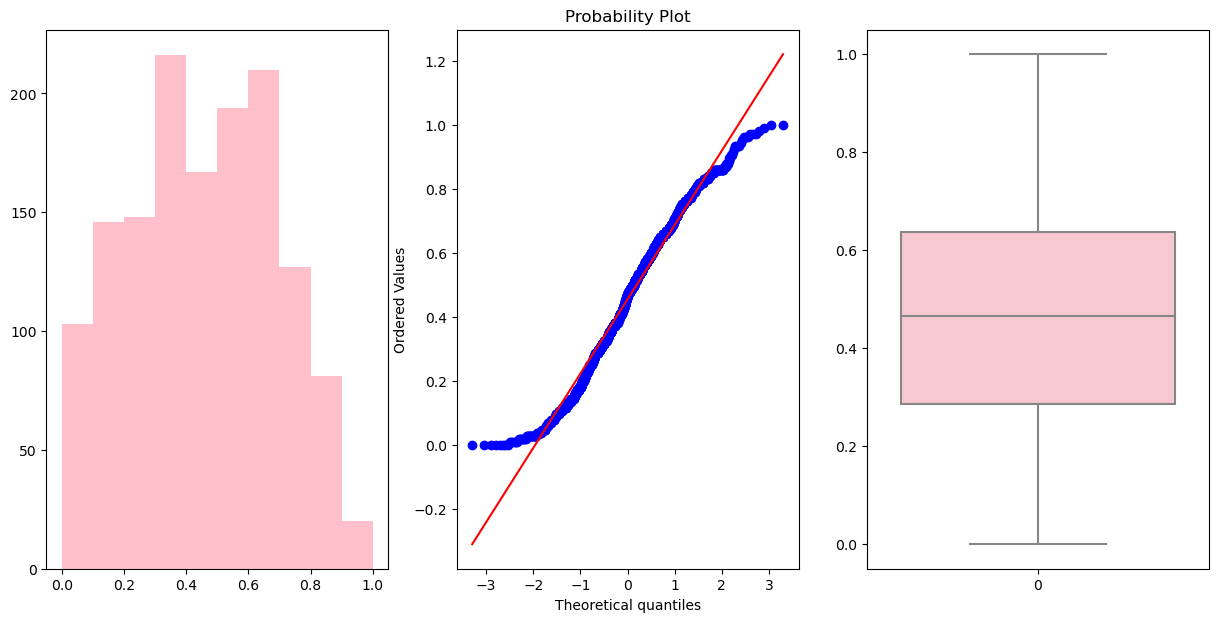

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for K is shown ↓


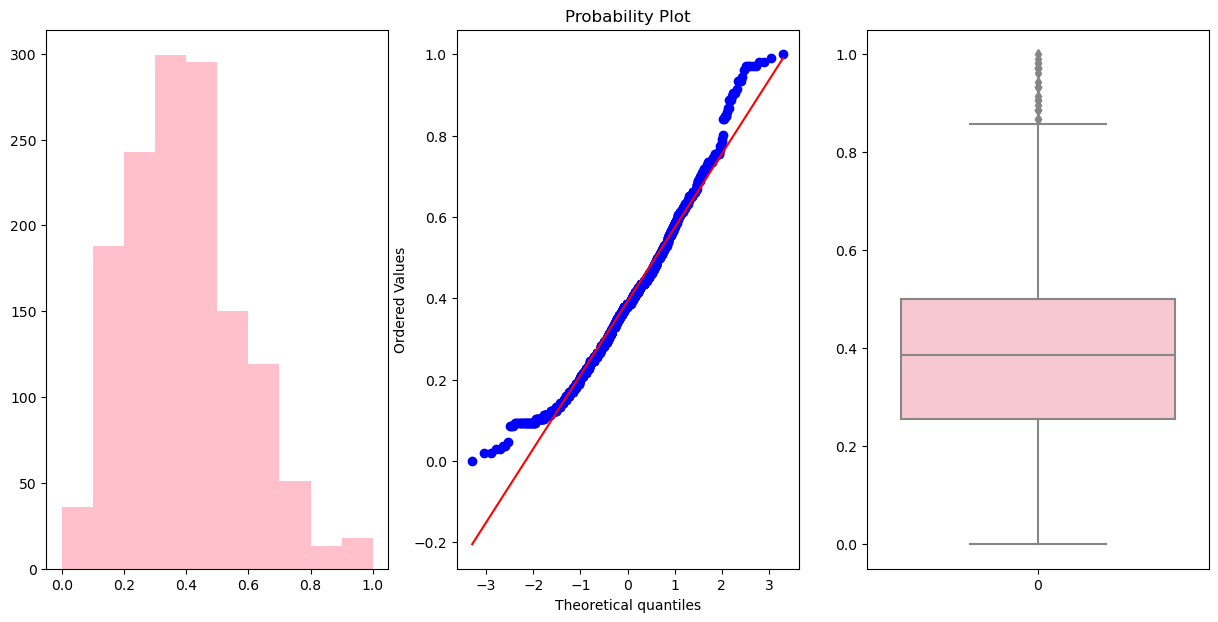

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for temperature is shown ↓


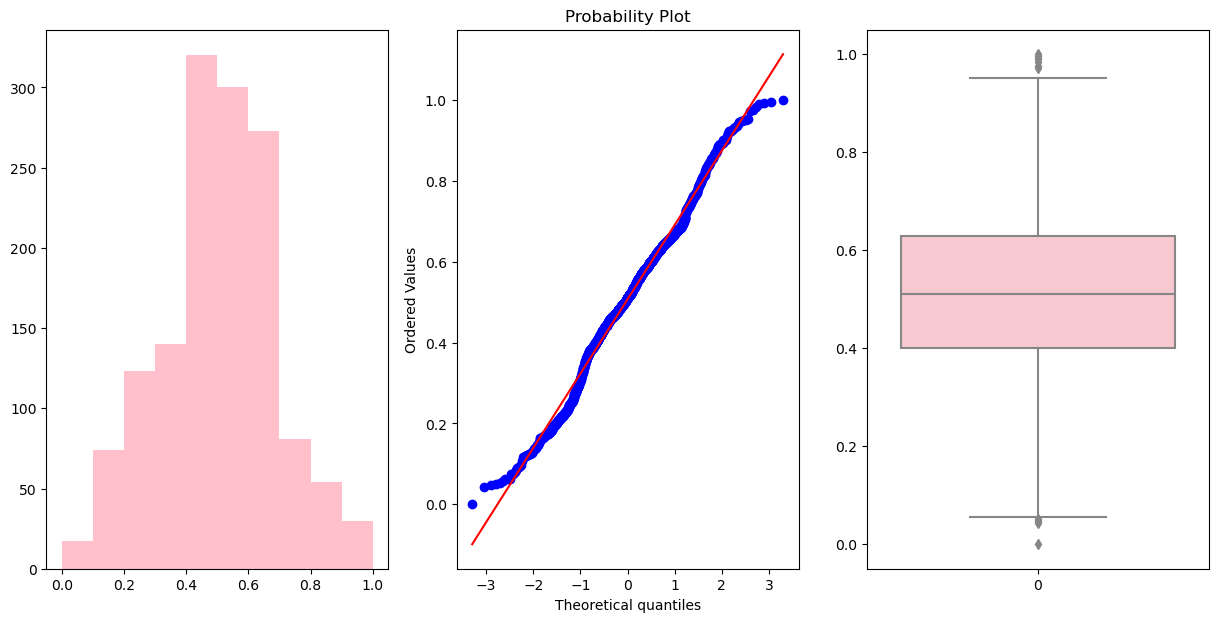

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for humidity is shown ↓


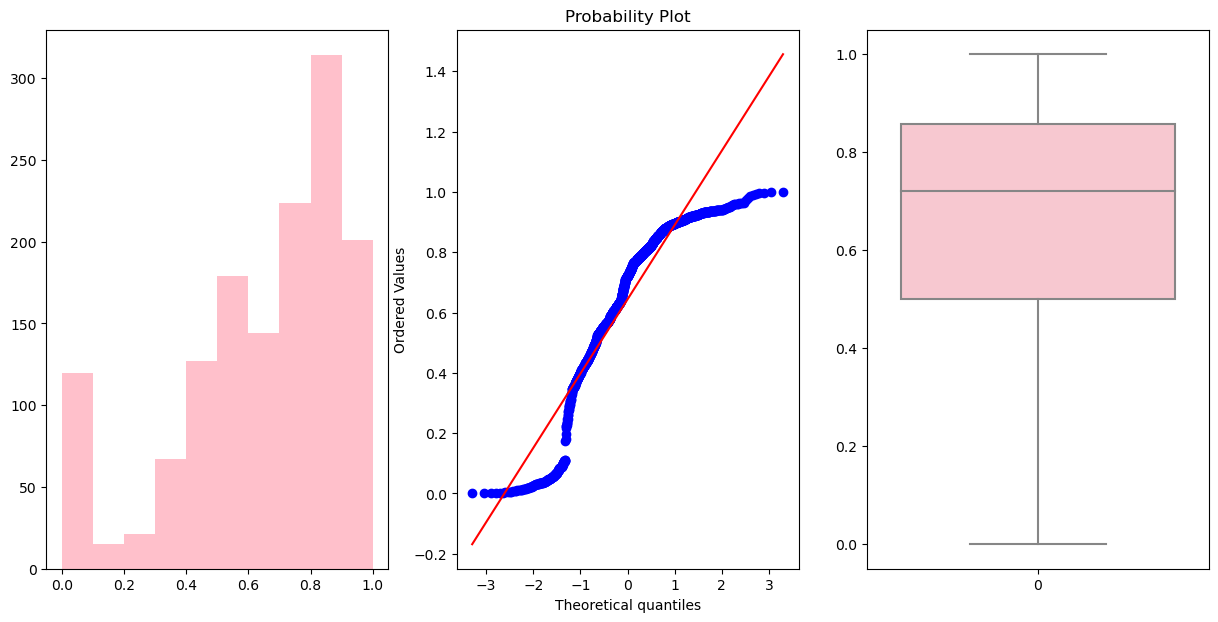

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for ph is shown ↓


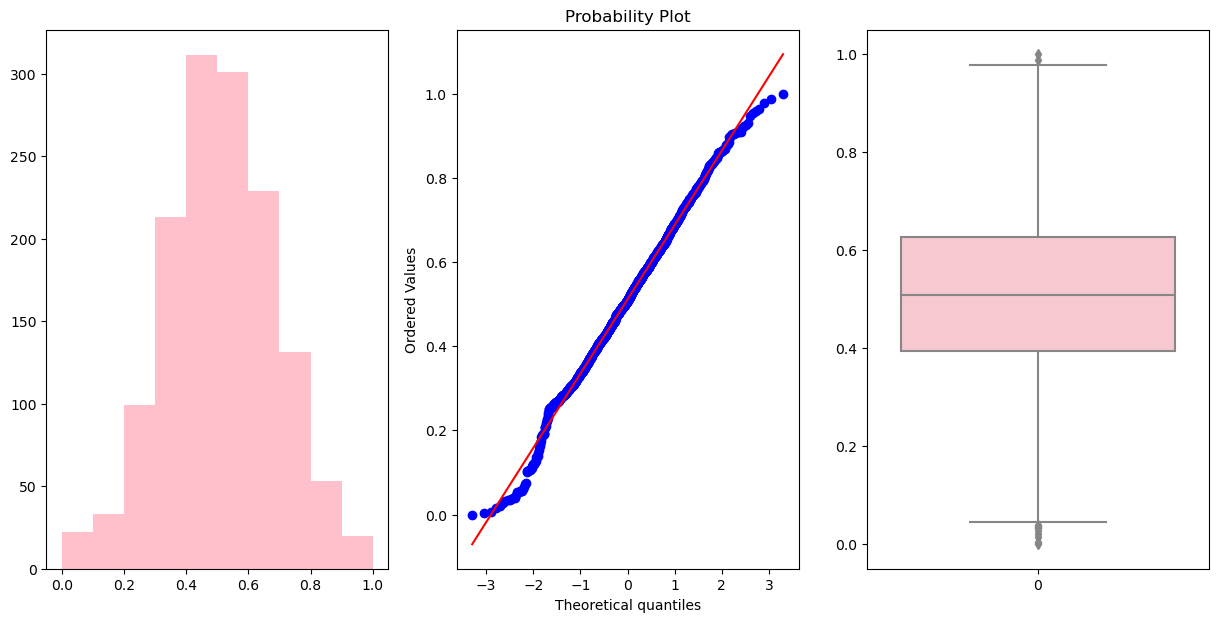

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for rainfall is shown ↓


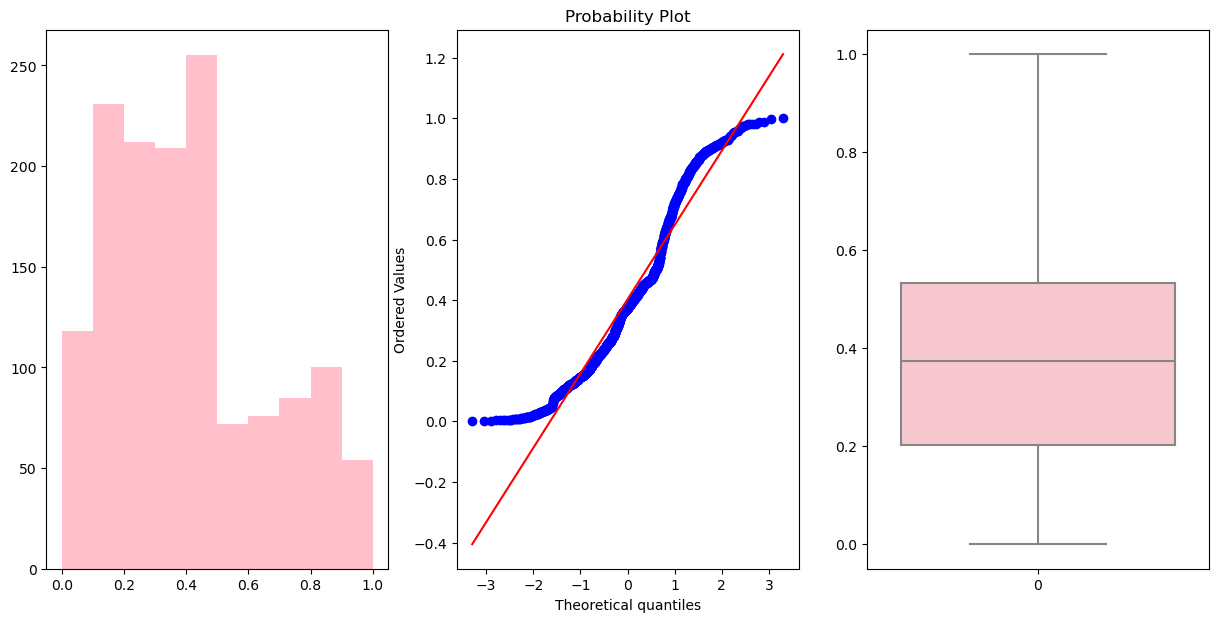

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


In [34]:
scaled_mm = pd.DataFrame(train_mm,columns=train.columns)
for i in scaled_mm.columns:
    print(f' Statistical plots for {i} is shown ↓')
    visualise(scaled_mm,i)
    print("=>"*50)

In [35]:
scaled_mm.head()

,N,P,K,temperature,humidity,ph,rainfall
0,0.000000,0.257143,0.405660,0.618407,0.951347,0.295029,0.951188
1,0.478571,0.628571,0.424528,0.393782,0.685041,0.344271,0.383577
2,0.357143,0.514286,0.160377,0.672960,0.633172,0.596103,0.235332
3,0.285714,0.742857,0.254717,0.396553,0.074002,0.315676,0.349260
4,0.821429,0.285714,0.575472,0.646145,0.893085,0.388227,0.046122


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


((array([-3.29576125, -3.03787488, -2.89442031, ...,  2.89442031,
          3.03787488,  3.29576125]),
  array([-4.11910902, -4.11910902, -4.11910902, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

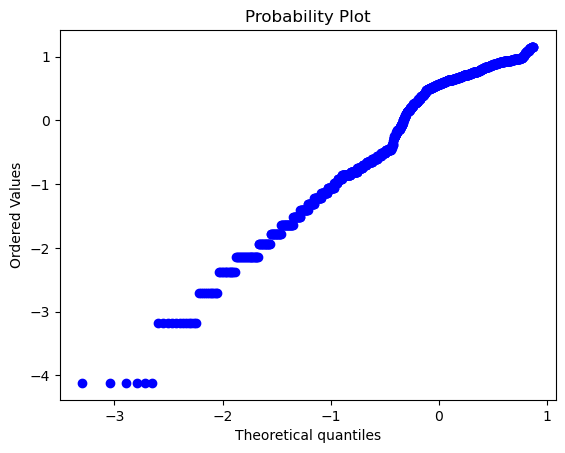

In [36]:
dum = scaled_df.copy()
dum['N'] = np.log(dum['N']+1)
stats.probplot(dum['N'],dist = 'norm',plot=plt)

((array([-3.29576125, -3.03787488, -2.89442031, ...,  2.89442031,
          3.03787488,  3.29576125]),
  array([-5.27397617, -5.03519504, -4.1352423 , ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

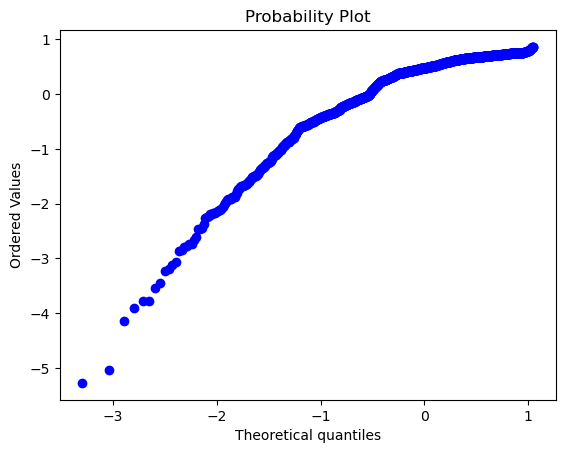

In [37]:
dum = scaled_df.copy()
dum['humidity'] = np.log(dum['humidity']+1)
stats.probplot(dum['humidity'],dist = 'norm',plot=plt)

In [38]:
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.fit_transform(X_test)

### ML ALGO 

In [39]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn import tree

In [40]:
X_train_df = pd.DataFrame(X_train_scaled,columns=train.columns)
X_train_df.head()

,N,P,K,temperature,humidity,ph,rainfall
0,0.000000,0.257143,0.405660,0.618407,0.951347,0.295029,0.951188
1,0.478571,0.628571,0.424528,0.393782,0.685041,0.344271,0.383577
2,0.357143,0.514286,0.160377,0.672960,0.633172,0.596103,0.235332
3,0.285714,0.742857,0.254717,0.396553,0.074002,0.315676,0.349260
4,0.821429,0.285714,0.575472,0.646145,0.893085,0.388227,0.046122


In [41]:
X_train_scaled

array([[0.        , 0.25714286, 0.40566038, ..., 0.95134711, 0.29502877,
        0.95118833],
       [0.47857143, 0.62857143, 0.4245283 , ..., 0.68504093, 0.34427106,
        0.38357673],
       [0.35714286, 0.51428571, 0.16037736, ..., 0.63317213, 0.59610337,
        0.23533169],
       ...,
       [0.45714286, 0.58095238, 0.19811321, ..., 0.59561248, 0.5030798 ,
        0.21890641],
       [0.43571429, 0.62857143, 0.39622642, ..., 0.78278677, 0.61008026,
        0.88315787],
       [0.77142857, 0.85714286, 0.5754717 , ..., 0.73018314, 0.3962474 ,
        0.46656671]])

[Text(0.44741586538461536, 0.9666666666666667, 'rainfall <= 30.393\ngini = 0.947\nsamples = 1412\nvalue = [26, 78, 49, 83, 75, 43, 83, 83, 81, 74, 77, 80\n81, 77, 64, 46, 68, 80, 84, 80]'),
 Text(0.42818509615384615, 0.9, 'gini = 0.0\nsamples = 77\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77\n0, 0, 0, 0, 0, 0]'),
 Text(0.46664663461538464, 0.9, 'N <= 60.5\ngini = 0.944\nsamples = 1335\nvalue = [26, 78, 49, 83, 75, 43, 83, 83, 81, 74, 77, 80\n81, 0, 64, 46, 68, 80, 84, 80]'),
 Text(0.2548076923076923, 0.8333333333333334, 'humidity <= 74.979\ngini = 0.912\nsamples = 815\nvalue = [0, 0, 49, 83, 75, 43, 83, 83, 81, 74, 0, 80, 0\n0, 64, 31, 68, 0, 1, 0]'),
 Text(0.10096153846153846, 0.7666666666666667, 'humidity <= 27.685\ngini = 0.85\nsamples = 494\nvalue = [0, 0, 49, 83, 75, 43, 0, 83, 81, 0, 0, 80, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(0.038461538461538464, 0.7, 'K <= 49.5\ngini = 0.467\nsamples = 132\nvalue = [0, 0, 49, 83, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.01

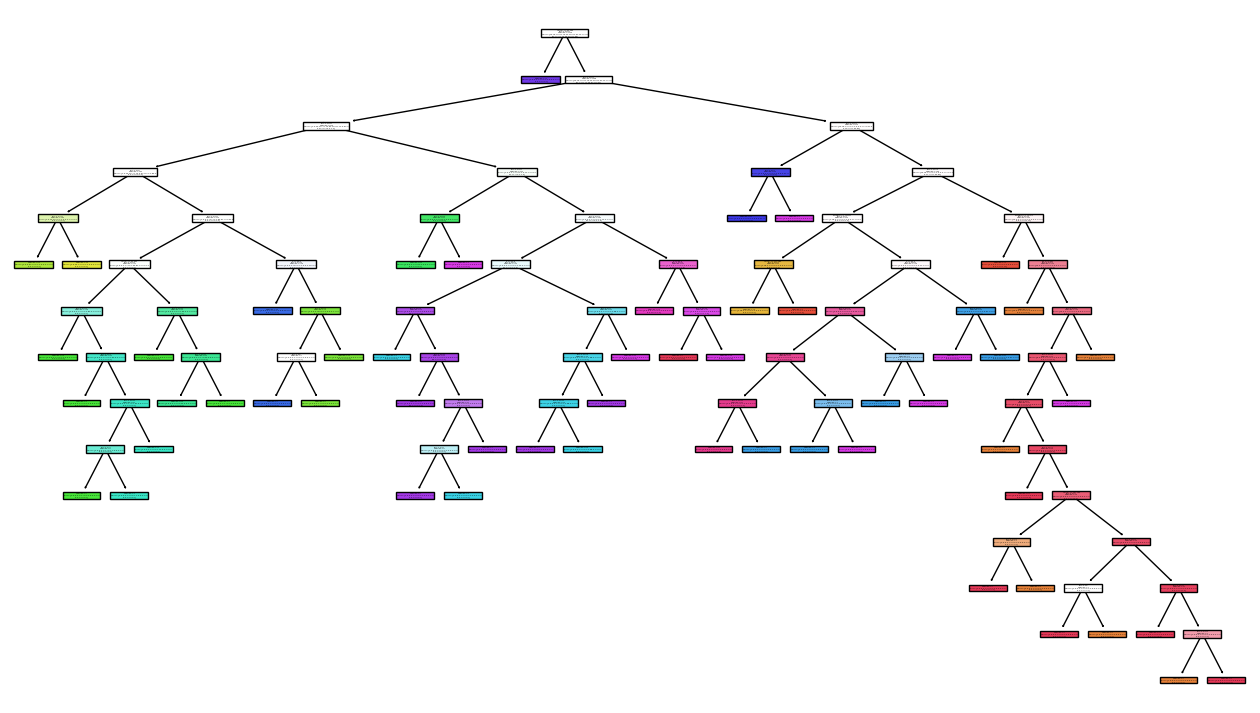

In [42]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns)

In [43]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.00068537, 0.0006989 , 0.00069958, 0.00106232,
       0.00106232, 0.00125716, 0.00131526, 0.00134789, 0.0013959 ,
       0.00139894, 0.00139957, 0.00148913, 0.00240963, 0.00275075,
       0.00283286, 0.00367042, 0.00399994, 0.00409191, 0.00427094,
       0.00520117, 0.0053991 , 0.00540523, 0.006175  , 0.00791428,
       0.00831812, 0.00875592, 0.01235789, 0.01535371, 0.01557739,
       0.02709106, 0.03224801, 0.04148456, 0.04174239, 0.04364109,
       0.04801002, 0.05155725, 0.05210725, 0.05219416, 0.05310389,
       0.05442051])

In [44]:
alpha_list = []
for i in ccp_alpha:
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    clf.fit(X_train,y_train)
    alpha_list.append(clf)


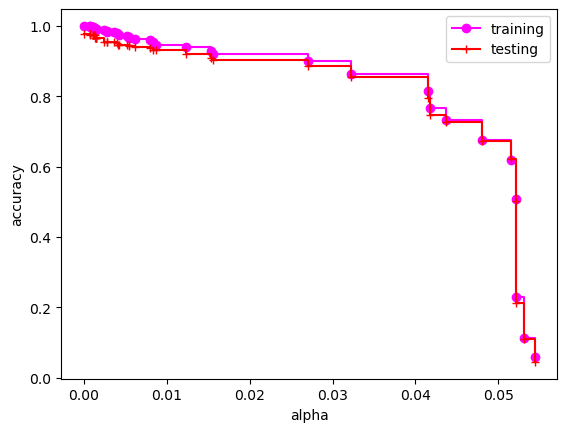

In [45]:
train_score = [clf.score(X_train,y_train) for clf in alpha_list]
test_score =  [clf.score(X_test,y_test) for clf in alpha_list]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,train_score,marker = 'o',label = 'training',color = 'magenta',drawstyle = 'steps-post')
plt.plot(ccp_alpha,test_score,marker = '+',label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

[Text(0.4375, 0.9285714285714286, 'rainfall <= 30.393\ngini = 0.947\nsamples = 1412\nvalue = [26, 78, 49, 83, 75, 43, 83, 83, 81, 74, 77, 80\n81, 77, 64, 46, 68, 80, 84, 80]'),
 Text(0.375, 0.7857142857142857, 'gini = 0.0\nsamples = 77\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77\n0, 0, 0, 0, 0, 0]'),
 Text(0.5, 0.7857142857142857, 'N <= 60.5\ngini = 0.944\nsamples = 1335\nvalue = [26, 78, 49, 83, 75, 43, 83, 83, 81, 74, 77, 80\n81, 0, 64, 46, 68, 80, 84, 80]'),
 Text(0.3125, 0.6428571428571429, 'humidity <= 74.979\ngini = 0.912\nsamples = 815\nvalue = [0, 0, 49, 83, 75, 43, 83, 83, 81, 74, 0, 80, 0\n0, 64, 31, 68, 0, 1, 0]'),
 Text(0.1875, 0.5, 'humidity <= 27.685\ngini = 0.85\nsamples = 494\nvalue = [0, 0, 49, 83, 75, 43, 0, 83, 81, 0, 0, 80, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(0.125, 0.35714285714285715, 'gini = 0.467\nsamples = 132\nvalue = [0, 0, 49, 83, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.25, 0.35714285714285715, 'rainfall <= 82.104\ngini = 0.791\nsampl

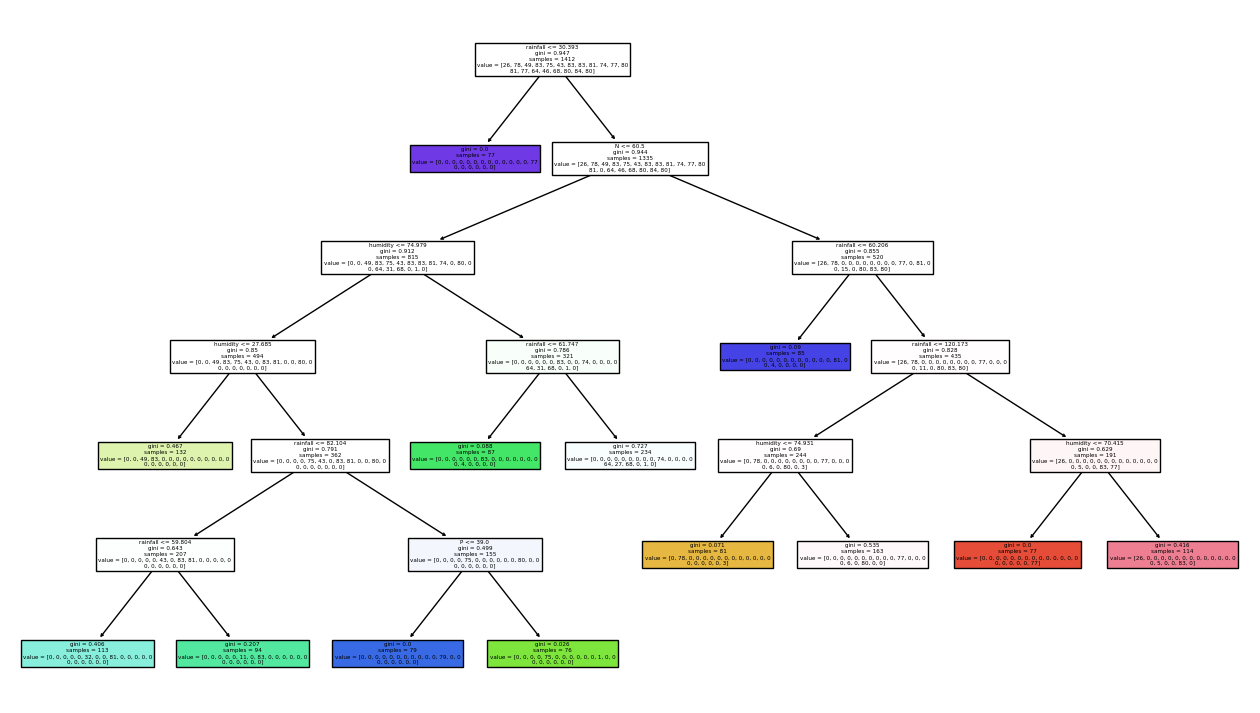

In [46]:
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.045)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns)

In [55]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    
   'logistic': {
    'model': LogisticRegression(),
    'params': {
        'penalty': ['elasticnet'],
        'C': [0.25, 0.50, 0.75, 1.0],
        'tol': [1e-10, 1e-5, 1e-4, 1e-3, 0.025, 0.25, 0.50],
        'solver': ['saga'],  # 'saga' solver is typically used with 'elasticnet'
        'multi_class': ['auto', 'ovr', 'multinomial'],
        'max_iter': [int(x) for x in np.linspace(start=1, stop=250, num=10)],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],  # Specify valid l1_ratio values
    }
},
    'D-tree': {
    'model': DecisionTreeClassifier(),
    'params': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'min_samples_split': [2, 5, 10, 12],  # Ensure it's >= 2
        'min_samples_leaf': [1, 2, 5, 10, 12],
        'max_features': ['auto', 'sqrt'],
        'ccp_alpha': [0.030, 0.035, 0.040, 0.045, 0.050],
    }
},
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [56]:
scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions= mp['params'],cv = 5,n_jobs=-1,n_iter = 10,scoring='accuracy',
                            verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=222).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [57]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_estimator','best_score'])
scores_df

,model_name,best_estimator,best_score
0,RandomForest,"(DecisionTreeClassifier(ccp_alpha=0.03, max_de...",0.902970
1,logistic,"LogisticRegression(l1_ratio=0.9, max_iter=250,...",0.888823
2,D-tree,"DecisionTreeClassifier(ccp_alpha=0.04, criteri...",0.786818
3,SVM,"SVC(kernel='poly', max_iter=222, tol=0.0001)",0.962459


In [58]:
for i in scores_df['best_estimator']:
    print(i)

RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=5,
                       n_estimators=533)
LogisticRegression(l1_ratio=0.9, max_iter=250, penalty='elasticnet',
                   solver='saga', tol=0.001)
DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy', max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=12)
SVC(kernel='poly', max_iter=222, tol=0.0001)


In [59]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)

lr = LogisticRegression(C=0.75, max_iter=194, multi_class='ovr', penalty='l1',
                   solver='liblinear')

svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)

rf_val = cross_val_score(estimator=rf,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
lr_val = cross_val_score(estimator = lr,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
svc_val = cross_val_score(estimator=svc,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)

In [60]:
score_list = [rf_val,lr_val,svc_val]
model_name = ['rf','lr','svc']
for i,j in zip(score_list,model_name):
    print(f' Model : {j} gave {i.mean()} accuracy')

 Model : rf gave 0.9043460764587525 accuracy
 Model : lr gave 0.8937625754527163 accuracy
 Model : svc gave 0.9702816901408451 accuracy


In [61]:
from sklearn import metrics

In [62]:
svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train_scaled,y_train)
svc.score(X_train_scaled,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=139).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9865439093484419

In [63]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)

rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9079320113314447

In [64]:
svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train,y_train)
svc.score(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=139).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9716713881019831

In [65]:
svc.score(X_test,y_test)

0.9293785310734464

<Axes: >

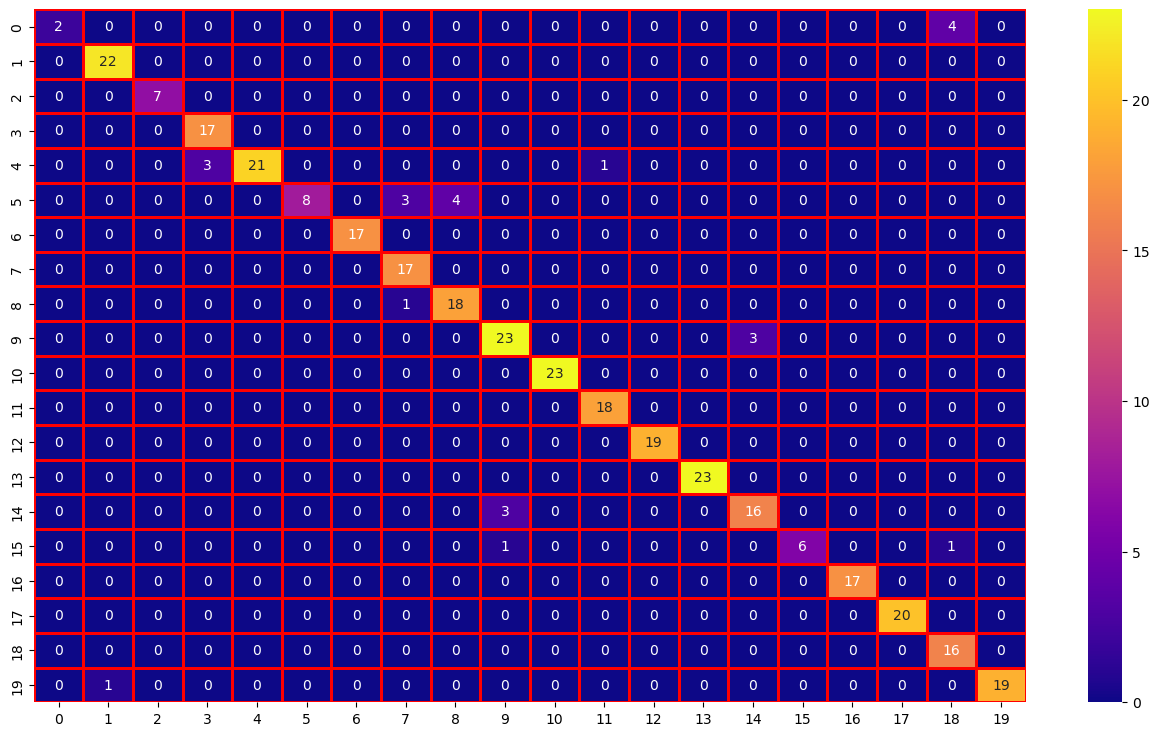

In [66]:
y_pred = svc.predict(X_test)
cn = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(16,9))
sn.heatmap(cn,annot=True,linecolor='red',linewidths=2,cmap='plasma')

In [67]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         6
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00         7
           4       0.85      1.00      0.92        17
           5       1.00      0.84      0.91        25
           6       1.00      0.53      0.70        15
           7       1.00      1.00      1.00        17
           8       0.81      1.00      0.89        17
           9       0.82      0.95      0.88        19
          10       0.85      0.88      0.87        26
          11       1.00      1.00      1.00        23
          12       0.95      1.00      0.97        18
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        23
          17       0.84      0.84      0.84        19
          18       1.00      0.75      0.86         8
          19       1.00      1.00      1.00        17
          20       1.00    

In [68]:
train.shape,temp.shape

((1766, 7), (1766, 8))

In [69]:
train = np.array(train)
predict_list = []
for i in range(0,len(train)):
    predict_list.append(svc.predict([train[i]]))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\U

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\U

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\U

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\U

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\U

In [70]:
predict_list = np.array(predict_list)

In [71]:
temp.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1
13,86,20.0,31.0,24.014976,82.056872,6.984354,185.277339,1
14,75,22.0,56.0,25.665852,80.663850,6.948020,209.586971,1
17,69,45.0,28.0,23.793920,80.418180,6.970860,206.261186,1
20,62,49.0,37.0,21.325042,80.474764,6.442475,185.497473,1


In [72]:
original_labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map_new = {i+1:original_labels[i] for i in range(len(original_labels))}
labels_map_new

{1: 'rice',
 2: 'maize',
 3: 'chickpea',
 4: 'kidneybeans',
 5: 'pigeonpeas',
 6: 'mothbeans',
 7: 'mungbean',
 8: 'blackgram',
 9: 'lentil',
 10: 'pomegranate',
 11: 'banana',
 12: 'mango',
 13: 'grapes',
 14: 'watermelon',
 15: 'muskmelon',
 16: 'apple',
 17: 'orange',
 18: 'papaya',
 19: 'coconut',
 20: 'cotton',
 21: 'jute',
 22: 'coffee'}

In [73]:
temp['Original_labels'] = temp['label'].map(labels_map_new)
temp.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Original_labels
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1,rice
13,86,20.0,31.0,24.014976,82.056872,6.984354,185.277339,1,rice
14,75,22.0,56.0,25.665852,80.663850,6.948020,209.586971,1,rice
17,69,45.0,28.0,23.793920,80.418180,6.970860,206.261186,1,rice
20,62,49.0,37.0,21.325042,80.474764,6.442475,185.497473,1,rice


In [74]:
temp['SVM_pred'] = predict_list

In [75]:
temp['Predicted_labels'] = temp['SVM_pred'].map(labels_map_new)
temp.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Original_labels,SVM_pred,Predicted_labels
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1,rice,1,rice
13,86,20.0,31.0,24.014976,82.056872,6.984354,185.277339,1,rice,21,jute
14,75,22.0,56.0,25.665852,80.663850,6.948020,209.586971,1,rice,1,rice
17,69,45.0,28.0,23.793920,80.418180,6.970860,206.261186,1,rice,21,jute
20,62,49.0,37.0,21.325042,80.474764,6.442475,185.497473,1,rice,21,jute


<Axes: xlabel='Original_labels', ylabel='count'>

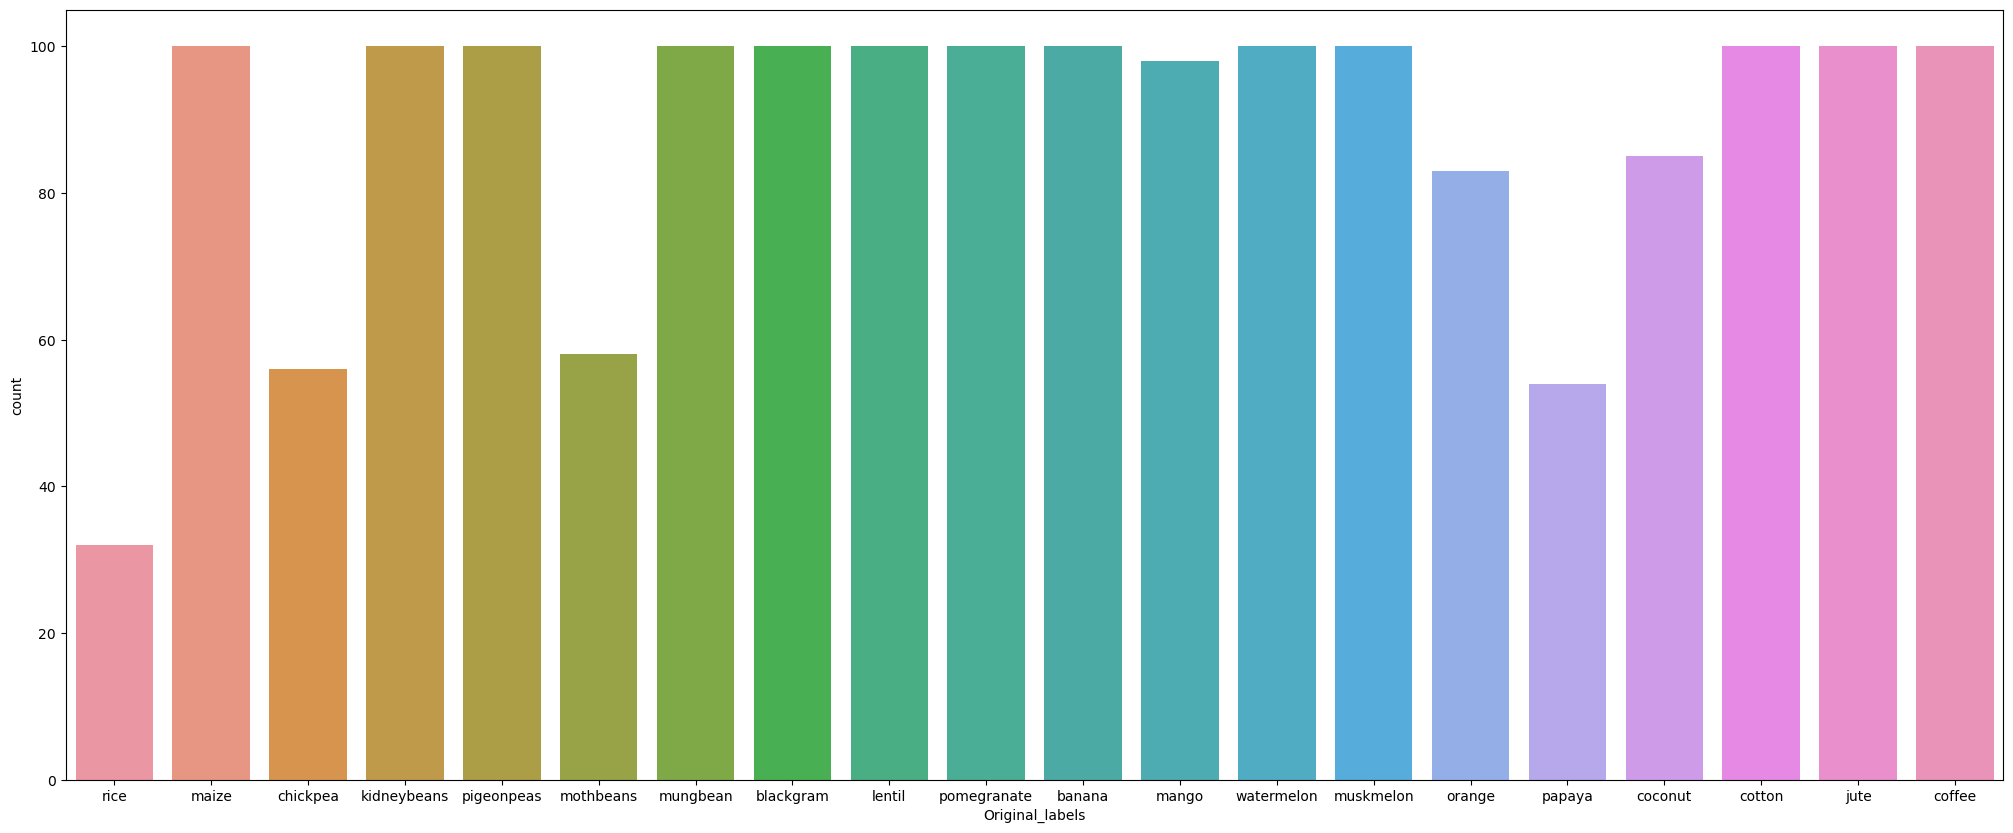

In [76]:
plt.figure(figsize=(25,10))
sn.countplot(data=temp,x = 'Original_labels')


<Axes: xlabel='Predicted_labels', ylabel='count'>

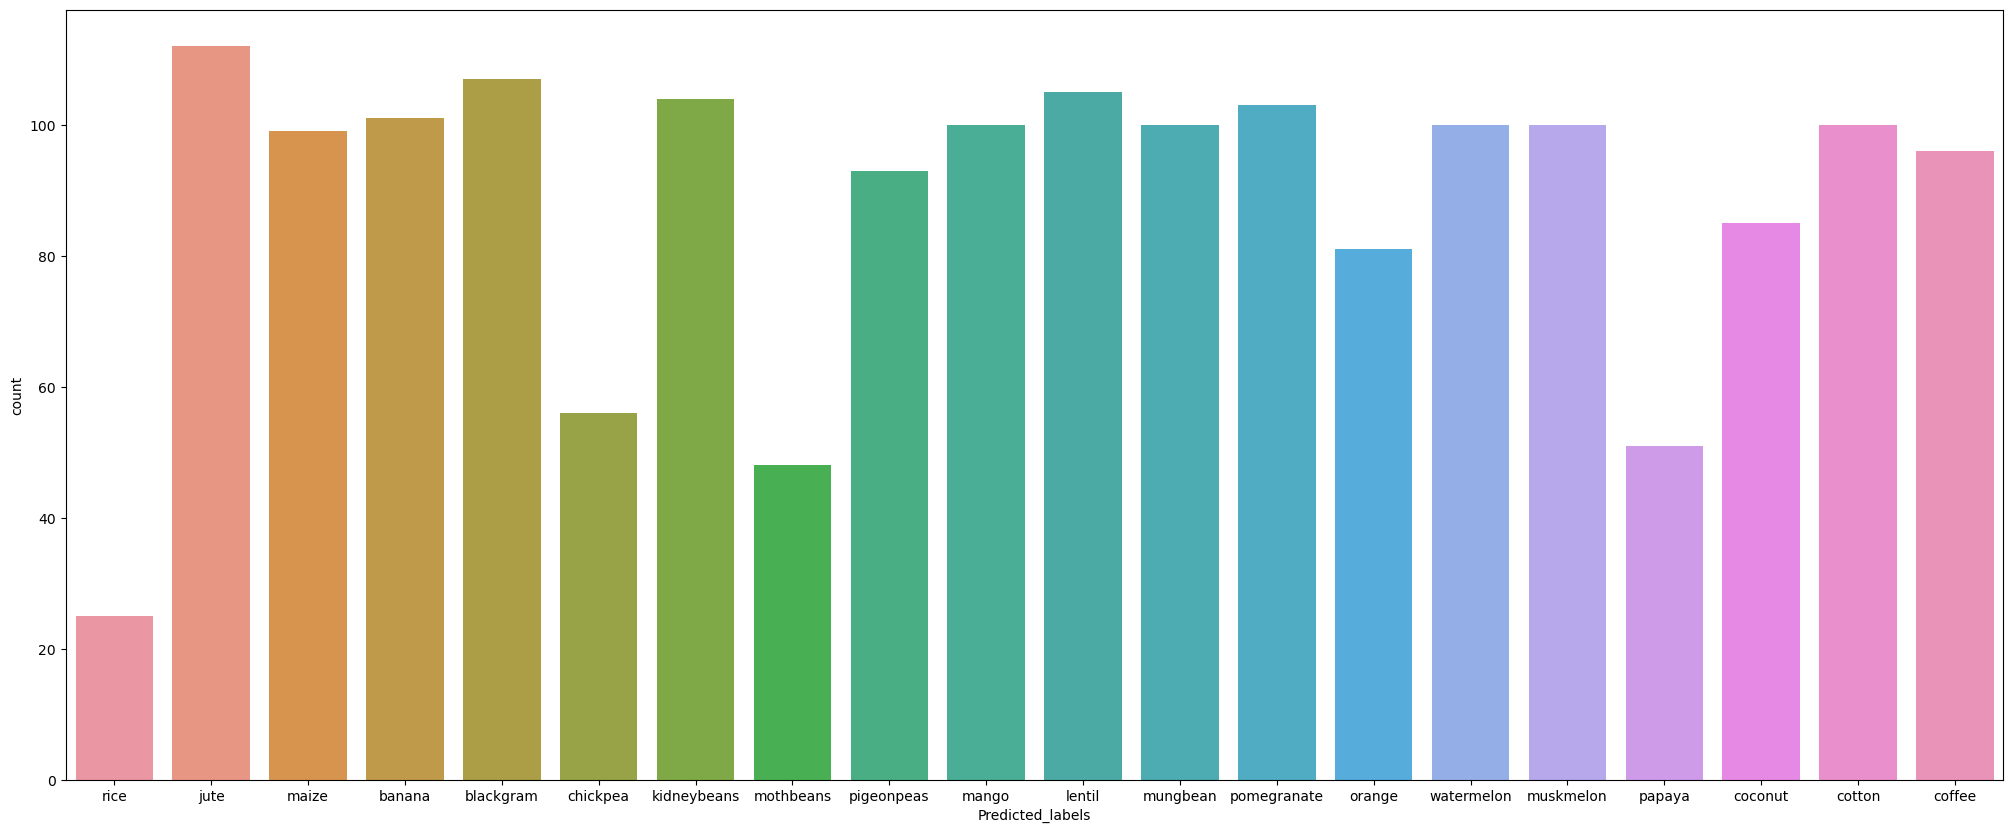

In [77]:
plt.figure(figsize=(25,10))
sn.countplot(data = temp,x = 'Predicted_labels')

In [78]:
temp['Predicted_labels'].value_counts()

jute           112
blackgram      107
lentil         105
kidneybeans    104
pomegranate    103
banana         101
cotton         100
muskmelon      100
watermelon     100
mango          100
mungbean       100
maize           99
coffee          96
pigeonpeas      93
coconut         85
orange          81
chickpea        56
papaya          51
mothbeans       48
rice            25
Name: Predicted_labels, dtype: int64

In [79]:
temp['Original_labels'].value_counts()

banana         100
lentil         100
jute           100
cotton         100
muskmelon      100
watermelon     100
maize          100
pomegranate    100
coffee         100
blackgram      100
mungbean       100
pigeonpeas     100
kidneybeans    100
mango           98
coconut         85
orange          83
mothbeans       58
chickpea        56
papaya          54
rice            32
Name: Original_labels, dtype: int64

In [80]:
a = temp[temp['Original_labels']!=temp['Predicted_labels']].style.background_gradient('plasma')
a

,N,P,K,temperature,humidity,ph,rainfall,label,Original_labels,SVM_pred,Predicted_labels
13,86,20.000000,31.000000,24.014976,82.056872,6.984354,185.277339,1,rice,21,jute
17,69,45.000000,28.000000,23.793920,80.418180,6.970860,206.261186,1,rice,21,jute
20,62,49.000000,37.000000,21.325042,80.474764,6.442475,185.497473,1,rice,21,jute
29,67,20.000000,45.000000,22.301574,80.644165,6.043305,197.979121,1,rice,21,jute
45,84,49.000000,31.000000,24.897282,80.525861,6.134287,183.679321,1,rice,21,jute
46,74,58.000000,46.000000,24.958779,84.479634,5.206373,196.956001,1,rice,21,jute
58,83,21.000000,21.000000,20.280194,82.123542,7.236705,191.953574,1,rice,21,jute
63,62,44.000000,26.000000,21.841069,80.728864,6.946210,202.383832,1,rice,21,jute
73,82,45.000000,26.000000,21.323763,83.003205,7.283737,192.319754,1,rice,21,jute
77,88,32.000000,32.000000,24.889212,81.979271,5.005307,185.946143,1,rice,21,jute


In [81]:
tru = temp['Original_labels'].values
tru = list(tru.flatten())
predict = temp['Predicted_labels'].values
predict = list(predict.flatten())

In [82]:
count = 0
for i,j in zip(tru,predict):
    if i!=j:
        
        count+=1

In [83]:
print(f'Total Values after Preprocessing : {temp.shape[0]}\nMisclassified values are : {temp.shape[0]-count}')

Total Values after Preprocessing : 1766
Misclassified values are : 1701


In [84]:
# 21st label is jute!

data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])


data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])

jute
coffee


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Saving the Model

In [131]:
import pickle
svm_model_pkl = open('crop_classification_model.pkl', 'wb')
pickle.dump(svc, svm_model_pkl)
svm_model_pkl.close()

In [132]:
file = open('cropmodel2.pkl','wb')
pickle.dump(svc,file)
file.close()